## Introduction to predictive analysis: the sinking of Titanic

https://www.kaggle.com/c/titanic-gettingStarted

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

VARIABLE DESCRIPTIONS:
survival        Survival
                (0 = No; 1 = Yes)
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
name            Name
sex             Sex
age             Age
sibsp           Number of Siblings/Spouses Aboard
parch           Number of Parents/Children Aboard
ticket          Ticket Number
fare            Passenger Fare
cabin           Cabin
embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)

SPECIAL NOTES:
Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1)
 If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch)
some relations were ignored.  The following are the definitions used
for sibsp and parch.

Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
Parent:   Mother or Father of Passenger Aboard Titanic
Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
only with a nanny, therefore parch=0 for them.  As well, some
travelled with very close friends or neighbors in a village, however,
the definitions do not support such relations.

#### Loading the usual packages...  

In [1]:
import os
import sys
import time
import pickle
import itertools
import pandas as pd
import numpy as np
import pylab
import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

#import seaborn as sns
import seaborn.apionly as sns

%matplotlib inline
#%matplotlib notebook
#matplotlib.rcdefaults()
#matplotlib.verbose.set_level('silent')

/usr/local/lib/python3.5/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


#### Importing the datasets

In [2]:
datapath = "../datasets/"
outputs = "../outputs/"

In [3]:
df_train = pd.read_csv(os.path.join(datapath,'Kaggle/kaggle_titanic_train.csv'))
df_test = pd.read_csv(os.path.join(datapath,'Kaggle/kaggle_titanic_test.csv'))

#### Exploring Data

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
df_train.dtypes[df_train.dtypes.map(lambda x: x=='int64')]

PassengerId    int64
Survived       int64
Pclass         int64
SibSp          int64
Parch          int64
dtype: object

In [8]:
df_train.dtypes[df_train.dtypes.map(lambda x: x=='float64')]

Age     float64
Fare    float64
dtype: object

In [9]:
df_train.dtypes[df_train.dtypes.map(lambda x: x=='object')]

Name        object
Sex         object
Ticket      object
Cabin       object
Embarked    object
dtype: object

In [10]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
for cat in df_train.columns:
    print("Number of levels in category '{0}': \b {1:2.2f} ".format(cat, df_train[cat].unique().size))

Number of levels in category 'PassengerId':  891.00 
Number of levels in category 'Survived':  2.00 
Number of levels in category 'Pclass':  3.00 
Number of levels in category 'Name':  891.00 
Number of levels in category 'Sex':  2.00 
Number of levels in category 'Age':  89.00 
Number of levels in category 'SibSp':  7.00 
Number of levels in category 'Parch':  7.00 
Number of levels in category 'Ticket':  681.00 
Number of levels in category 'Fare':  248.00 
Number of levels in category 'Cabin':  148.00 
Number of levels in category 'Embarked':  4.00 


#### Describing the numeric values

In [12]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Examining the categorical values

In [13]:
# There are many values for name and ticket

for cat in ['Sex', 'Survived', 'Pclass', 'SibSp', 'Embarked', 'Cabin']:
    print("Unique values for category '{0}': \b {1} ".format(cat, df_train[cat].unique()))

Unique values for category 'Sex':  ['male' 'female'] 
Unique values for category 'Survived':  [0 1] 
Unique values for category 'Pclass':  [3 1 2] 
Unique values for category 'SibSp':  [1 0 3 4 2 5 8] 
Unique values for category 'Embarked':  ['S' 'C' 'Q' nan] 
Unique values for category 'Cabin':  [nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49' 'F4'
 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77' 'E67'
 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106' 'C65'
 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91' 'E40'
 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34' 'C104'
 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79' 'E25'
 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68' 'A10'
 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A2

In [14]:
print(df_train.Survived.value_counts())

0    549
1    342
Name: Survived, dtype: int64


In [15]:
df_train.groupby('Sex').Survived.value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [16]:
df_by_sex = df_train.groupby('Sex')
df_by_sex.describe()

Age                                                       Fare  \
        count       mean        std   min   25%   50%   75%   max  count   
Sex                                                                        
female  261.0  27.915709  14.110146  0.75  18.0  27.0  37.0  63.0  314.0   
male    453.0  30.726645  14.678201  0.42  21.0  29.0  39.0  80.0  577.0   

                  ...  SibSp      Survived                                     \
             mean ...    75%  max    count      mean       std  min  25%  50%   
Sex               ...                                                           
female  44.479818 ...    1.0  8.0    314.0  0.742038  0.438211  0.0  0.0  1.0   
male    25.523893 ...    0.0  8.0    577.0  0.188908  0.391775  0.0  0.0  0.0   

                  
        75%  max  
Sex               
female  1.0  1.0  
male    0.0  1.0  

[2 rows x 56 columns]

In [17]:
df_train.groupby('Pclass').Survived.value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [18]:
df_train.groupby(['Pclass']).Survived.value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [19]:
df_train.groupby(['Pclass']).Sex.value_counts()

Pclass  Sex   
1       male      122
        female     94
2       male      108
        female     76
3       male      347
        female    144
Name: Sex, dtype: int64

In [20]:
print('Male')
for i in range(1,4):
    print(i, len(df_train[ (df_train['Sex'] == 'male') & (df_train['Pclass'] == i) ]))
print()
print('Female')
for i in range(1,4):
    print(i, len(df_train[ (df_train['Sex'] == 'female') & (df_train['Pclass'] == i) ]))

Male
1 122
2 108
3 347

Female
1 94
2 76
3 144


In [21]:
df_by_class = df_train.groupby('Pclass')
df_by_class.describe()

Age                                                       Fare  \
        count       mean        std   min   25%   50%   75%   max  count   
Pclass                                                                     
1       186.0  38.233441  14.802856  0.92  27.0  37.0  49.0  80.0  216.0   
2       173.0  29.877630  14.001077  0.67  23.0  29.0  36.0  70.0  184.0   
3       355.0  25.140620  12.495398  0.42  18.0  24.0  32.0  74.0  491.0   

                  ...  SibSp      Survived                                     \
             mean ...    75%  max    count      mean       std  min  25%  50%   
Pclass            ...                                                           
1       84.154687 ...    1.0  3.0    216.0  0.629630  0.484026  0.0  0.0  1.0   
2       20.662183 ...    1.0  3.0    184.0  0.472826  0.500623  0.0  0.0  0.0   
3       13.675550 ...    1.0  8.0    491.0  0.242363  0.428949  0.0  0.0  0.0   

                  
        75%  max  
Pclass            
1       1.0  1.0  
2       1.0  1.0  
3       0.0  1.0  

[3 rows x 48 columns]

In [22]:
df_train.groupby(['Pclass','Sex']).Survived.value_counts()

Pclass  Sex     Survived
1       female  1            91
                0             3
        male    0            77
                1            45
2       female  1            70
                0             6
        male    0            91
                1            17
3       female  0            72
                1            72
        male    0           300
                1            47
Name: Survived, dtype: int64

In [23]:
id = pd.crosstab([df_train.Pclass, df_train.Sex], df_train.Survived.astype(float))
id.columns = (['No', 'Yes'])
id.columns.name = "Survived"
id.div(id.sum(1).astype(float), 0)

Survived             No       Yes
Pclass Sex                       
1      female  0.031915  0.968085
       male    0.631148  0.368852
2      female  0.078947  0.921053
       male    0.842593  0.157407
3      female  0.500000  0.500000
       male    0.864553  0.135447

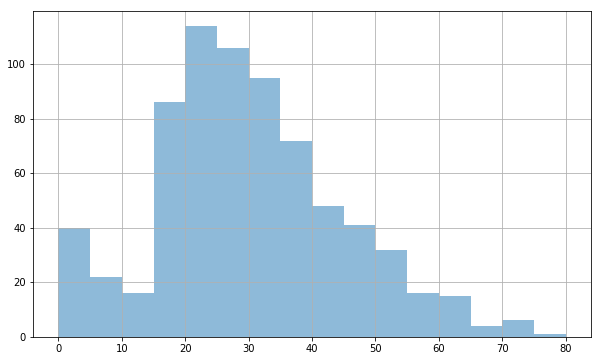

In [24]:
#df_train['Age'].hist()
df_train['Age'].dropna().hist(bins=16, range=(0,80), alpha = .5, figsize=(10,6))

In [25]:
ser, bins = pd.qcut(df_train.Age.dropna(), 5, retbins=True, labels=False)
print(bins)
df_train.groupby(ser).Survived.value_counts()

[  0.42  19.    25.    31.8   41.    80.  ]


Age  Survived
0.0  0           85
     1           79
1.0  0           92
     1           45
2.0  0           77
     1           50
3.0  0           81
     1           63
4.0  0           89
     1           53
Name: Survived, dtype: int64

#### Feature engineering

In [26]:
df_train['Gender'] = df_train['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
df_test['Gender'] = df_test['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

#### Filling the null values for Age

In [27]:
print(len(df_train[df_train['Age'].isnull()]))
print(len(df_test[df_test['Age'].isnull()]))

177
86


In [28]:
df_train['AgeFill'] = df_train['Age']
df_test['AgeFill'] = df_test['Age']

In [29]:
df_train[df_train['Age'].isnull()][['Gender','Pclass','Age','AgeFill']].head(4)

,Gender,Pclass,Age,AgeFill
5,1,3,NaN,NaN
17,1,2,NaN,NaN
19,0,3,NaN,NaN
26,1,3,NaN,NaN


In [30]:
median_ages = np.zeros((2,3))
for i in range(0, 2):
    for j in range(0, 3):
        median_ages[i,j] = df_train[(df_train['Gender'] == i) & (df_train['Pclass'] == j+1)]['Age'].dropna().median()

median_ages

array([[ 35. ,  28. ,  21.5],
       [ 40. ,  30. ,  25. ]])

In [31]:
for i in range(0, 2):
    for j in range(0, 3):
        df_train.loc[(df_train.Age.isnull()) & (df_train.Gender == i) & (df_train.Pclass == j+1),'AgeFill'] = median_ages[i,j]
        df_test.loc[(df_test.Age.isnull()) & (df_test.Gender == i) & (df_test.Pclass == j+1),'AgeFill'] = median_ages[i,j]

In [32]:
df_train[df_train['Age'].isnull()][['Gender','Pclass','Age','AgeFill']].head(4)

,Gender,Pclass,Age,AgeFill
5,1,3,NaN,25.0
17,1,2,NaN,30.0
19,0,3,NaN,21.5
26,1,3,NaN,25.0


#### One-Hot-Enconding the field "Embarked"

In [33]:
from sklearn.preprocessing import LabelBinarizer, MultiLabelBinarizer
lb = LabelBinarizer()
mlb = MultiLabelBinarizer()

In [34]:
df_train.groupby(['Embarked']).Survived.value_counts()

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

In [35]:
df_train[df_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,AgeFill
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,0,38.0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,0,62.0


In [36]:
df_train[59:64]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,AgeFill
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9000,NaN,S,1,11.0
60,61,0,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C,1,22.0
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0000,B28,NaN,0,38.0
62,63,0,1,"Harris, Mr. Henry Birkhardt",male,45.0,1,0,36973,83.4750,C83,S,1,45.0
63,64,0,3,"Skoog, Master. Harald",male,4.0,3,2,347088,27.9000,NaN,S,1,4.0


In [37]:
df_train[826:832]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,AgeFill
826,827,0,3,"Lam, Mr. Len",male,NaN,0,0,1601,56.4958,NaN,S,1,25.00
827,828,1,2,"Mallet, Master. Andre",male,1.00,0,2,S.C./PARIS 2079,37.0042,NaN,C,1,1.00
828,829,1,3,"McCormack, Mr. Thomas Joseph",male,NaN,0,0,367228,7.7500,NaN,Q,1,25.00
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.00,0,0,113572,80.0000,B28,NaN,0,62.00
830,831,1,3,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.00,1,0,2659,14.4542,NaN,C,0,15.00
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S,1,0.83


In [38]:
df_train.groupby(['Embarked']).Fare.mean()

Embarked
C    59.954144
Q    13.276030
S    27.079812
Name: Fare, dtype: float64

#### Associating the missing values to the most likely class

In [39]:
df_train['Embarked'] = df_train['Embarked'].map({np.nan:1,'C':1, 'Q':2,'S':3} ).astype(int)
df_test['Embarked'] = df_test['Embarked'].map({np.nan:1,'C':1, 'Q':2,'S':3} ).astype(int)

In [40]:
embarked = pd.DataFrame(lb.fit_transform(df_train['Embarked'].values), columns=['Emb1','Emb2','Emb3'])
df_train = pd.concat([df_train, embarked], axis=1)

In [41]:
embarked = pd.DataFrame(lb.fit_transform(df_test['Embarked'].values), columns=['Emb1','Emb2','Emb3'])
df_test = pd.concat([df_test, embarked], axis=1)

#### One-Hot-Enconding the field "Cabin"

In [42]:
df_train['Cabin'].value_counts()

C23 C25 C27        4
G6                 4
B96 B98            4
C22 C26            3
F33                3
E101               3
F2                 3
D                  3
C126               2
B5                 2
B35                2
C92                2
E25                2
C93                2
D26                2
E44                2
F G73              2
B18                2
B22                2
C2                 2
B49                2
E121               2
B77                2
B28                2
E67                2
C68                2
F4                 2
E33                2
C125               2
B57 B59 B63 B66    2
                  ..
B69                1
C104               1
B82 B84            1
E10                1
C95                1
B73                1
C86                1
B42                1
A10                1
E17                1
E63                1
D56                1
A32                1
D37                1
D45                1
C111               1
A5           

In [43]:
CabinTrans = pd.DataFrame(mlb.fit_transform([{str(val)} for val in df_train['Cabin'].values]))

In [44]:
CabinTrans

,0,1,2,3,4,5,6,7,8,9,...,138,139,140,141,142,143,144,145,146,147
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [45]:
#Give up using the feature
#df_train = pd.concat([df_train, CabinTrans], axis=1)

#### Creating a feature for number of relatives

In [46]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch']
df_train['Age*Class'] = df_train.AgeFill * df_train.Pclass

df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch']
df_test['Age*Class'] = df_test.AgeFill * df_test.Pclass

#### Discarding unused columns for predictive analysis

In [47]:
df_train2 = df_train.drop(['Age','Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1)
df_train2 = df_train2.dropna()

df_test2 = df_test.drop(['Age','Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1)
df_test2 = df_test2.dropna()

In [48]:
df_train2.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Gender,AgeFill,Emb1,Emb2,Emb3,FamilySize,Age*Class
0,1,0,3,1,0,7.2500,1,22.0,0,0,1,1,66.0
1,2,1,1,1,0,71.2833,0,38.0,1,0,0,1,38.0
2,3,1,3,0,0,7.9250,0,26.0,0,0,1,0,78.0
3,4,1,1,1,0,53.1000,0,35.0,0,0,1,1,35.0
4,5,0,3,0,0,8.0500,1,35.0,0,0,1,0,105.0


In [49]:
df_test2.head()

,PassengerId,Pclass,SibSp,Parch,Fare,Gender,AgeFill,Emb1,Emb2,Emb3,FamilySize,Age*Class
0,892,3,0,0,7.8292,1,34.5,0,1,0,0,103.5
1,893,3,1,0,7.0000,0,47.0,0,0,1,1,141.0
2,894,2,0,0,9.6875,1,62.0,0,1,0,0,124.0
3,895,3,0,0,8.6625,1,27.0,0,0,1,0,81.0
4,896,3,1,1,12.2875,0,22.0,0,0,1,2,66.0


In [50]:
df_test2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    417 non-null int64
Pclass         417 non-null int64
SibSp          417 non-null int64
Parch          417 non-null int64
Fare           417 non-null float64
Gender         417 non-null int64
AgeFill        417 non-null float64
Emb1           417 non-null int64
Emb2           417 non-null int64
Emb3           417 non-null int64
FamilySize     417 non-null int64
Age*Class      417 non-null float64
dtypes: float64(3), int64(9)
memory usage: 42.4 KB


In [51]:
df_train.rename(columns={'Survived': 'class'}, inplace=True)  #For the TPOT genetic algorithm we must rename our target 

#### Runnng correlation hypothesis:

In [52]:
y = df_train2.Survived
X = df_train2.Gender
model = sm.Logit(y, X)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.558118
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      890
Method:                           MLE   Df Model:                            0
Date:                Wed, 05 Jul 2017   Pseudo R-squ.:                  0.1619
Time:                        16:28:56   Log-Likelihood:                -497.28
converged:                       True   LL-Null:                       -593.33
                                        LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Gender        -1.4571      0.106    -13.701      0.000      -1.666      -1.249


In [53]:
y = df_train2.Survived
X = df_train2[['Gender','Pclass','AgeFill']]
model = sm.Logit(y, X)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.529672
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      888
Method:                           MLE   Df Model:                            2
Date:                Wed, 05 Jul 2017   Pseudo R-squ.:                  0.2046
Time:                        16:28:56   Log-Likelihood:                -471.94
converged:                       True   LL-Null:                       -593.33
                                        LLR p-value:                 1.910e-53
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Gender        -2.1764      0.170    -12.829      0.000      -2.509      -1.844
Pclass        -0.0671      0.

#### Preparing Data for predictions

In [54]:
train_data = df_train2.values
print(train_data.shape)
train_data

(891, 13)


array([[   1. ,    0. ,    3. , ...,    1. ,    1. ,   66. ],
       [   2. ,    1. ,    1. , ...,    0. ,    1. ,   38. ],
       [   3. ,    1. ,    3. , ...,    1. ,    0. ,   78. ],
       ..., 
       [ 889. ,    0. ,    3. , ...,    1. ,    3. ,   64.5],
       [ 890. ,    1. ,    1. , ...,    0. ,    0. ,   26. ],
       [ 891. ,    0. ,    3. , ...,    0. ,    0. ,   96. ]])

In [55]:
test_data = df_test2.values
print(test_data.shape)
test_data

(417, 12)


array([[  8.92000000e+02,   3.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   1.03500000e+02],
       [  8.93000000e+02,   3.00000000e+00,   1.00000000e+00, ...,
          1.00000000e+00,   1.00000000e+00,   1.41000000e+02],
       [  8.94000000e+02,   2.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   1.24000000e+02],
       ..., 
       [  1.30700000e+03,   3.00000000e+00,   0.00000000e+00, ...,
          1.00000000e+00,   0.00000000e+00,   1.15500000e+02],
       [  1.30800000e+03,   3.00000000e+00,   0.00000000e+00, ...,
          1.00000000e+00,   0.00000000e+00,   7.50000000e+01],
       [  1.30900000e+03,   3.00000000e+00,   1.00000000e+00, ...,
          0.00000000e+00,   2.00000000e+00,   7.50000000e+01]])

#### Adjusting features scales:   
http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html  

In [56]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(train_data[0::,2::])
X_test = scaler.fit_transform(test_data[0::,1::])

y_train = train_data[0::,1]

In [57]:
X_train[0]

array([ 0.82737724,  0.43279337, -0.47367361, -0.50244517,  0.73769513,
       -0.53489116, -0.48557557, -0.30756234,  0.61930636,  0.05915988,
        0.10799818])

In [58]:
X_test[0]

array([ 0.87532977, -0.50021819, -0.40080432, -0.49781052,  0.75735388,
        0.4054536 , -0.56904264,  2.83993264, -1.34817194, -0.55430942,
        1.65753892])

In [59]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

(891, 11)
(417, 11)
(891,)


http://stats.stackexchange.com/questions/95797/how-to-split-the-dataset-for-cross-validation-learning-curve-and-final-evaluat  
http://scikit-learn.org/stable/modules/cross_validation.html  

#### Importing modules for cross validation and evaluation of the models

In [60]:
from sklearn import model_selection

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score

#### Creating functions to help evaluate the models

In [61]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
def clf_eval(clf, X, y_true, classes=['Não Sobreviveu', 'Sobreviveu']):
    y_pred = clf.predict(X)
    clf_matrix = confusion_matrix(y_true, y_pred)
    print('Classification Report')
    print(classification_report(y_true, y_pred, target_names=classes))
    print('ROC Score: {}'.format(roc_auc_score(y_true, y_pred)))
    print('Accuracy Score: {}'.format(accuracy_score(y_true, y_pred)))
    print('Average Precision Score: {}'.format(average_precision_score(y_true, y_pred)))
    print('f1 Score: {}'.format(f1_score(y_true, y_pred)))
    plot_confusion_matrix(clf_matrix, classes=classes)
    return roc_auc_score(y_true, y_pred)

#### Creating cross-validation with subsets (70% train / 30% test):  

http://scikit-learn.org/stable/modules/cross_validation.html  
http://www.analyticsvidhya.com/blog/2015/05/k-fold-cross-validation-simple/  
http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.cross_val_score.html  
http://stackoverflow.com/questions/25375203/identical-learning-curves-on-subsequent-runs-using-shufflesplit  
http://stackoverflow.com/questions/28064634/random-state-pseudo-random-numberin-scikit-learn  

In [62]:
X_traincv, X_testcv, y_traincv, y_testcv = model_selection.train_test_split(X_train,
                                                                            y_train,
                                                                            test_size=0.3,
                                                                            random_state=0)

In [63]:
print(X_traincv.shape)
print(X_testcv.shape)
print(y_traincv.shape)
print(y_testcv.shape)

(623, 11)
(268, 11)
(623,)
(268,)


#### Check if classes are balanced

In [64]:
print(len(y_traincv[y_traincv == 0]))
print(len(y_traincv[y_traincv == 1]))

381
242


#### Oversampling the minority class  
http://contrib.scikit-learn.org/imbalanced-learn/  

In [65]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(kind='regular')
X_traincv_res, y_traincv_res = smote.fit_sample(X_traincv, y_traincv)

In [66]:
print(len(y_traincv_res[y_traincv_res == 0]))
print(len(y_traincv_res[y_traincv_res == 1]))

381
381


#### Creating another train/test set using k-fold or other cross-validation method:  

In [67]:
cv = model_selection.StratifiedKFold(n_splits=10)

def mean_scores_cv(clf, cv, X, y):
    scores = model_selection.cross_val_score(clf, X, y, 
                                              scoring=None, 
                                              cv=cv, 
                                              n_jobs=1,
                                              verbose=0,
                                              fit_params=None,
                                              pre_dispatch='2*n_jobs')
    return scores.mean()

#### Choosing the best parameters using GridSearchCV and RandomizedSearchCV  
http://scikit-learn.org/stable/modules/grid_search.html  

In [68]:
#http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
from sklearn import svm


estimator = svm.SVC()
cv = model_selection.StratifiedKFold(n_splits=10)

kernels = ['linear', 'poly']
Cs = np.linspace(0.1,2,10)
degrees = [2,3,4]
gammas = np.logspace(-5, 0, 10)

param_grid=dict(kernel=kernels, C=Cs, gamma=gammas, degree=degrees)

clf_svc = model_selection.RandomizedSearchCV(estimator=estimator,
                                             cv=cv,
                                             param_distributions=param_grid, 
                                             n_jobs=-1).fit(X_train, y_train)

with open(os.path.join(outputs,'best_parameters_svm.pickle'), 'wb') as f:
    pickle.dump(clf_svc,f)

with open(os.path.join(outputs,'best_parameters_svm.pickle'), 'rb') as f:
    clf_svc = pickle.load(f)

print(clf_svc.best_score_)
print(clf_svc.best_estimator_.kernel)
print(clf_svc.best_estimator_.C)
print(clf_svc.best_estimator_.degree)
print(clf_svc.best_estimator_.gamma)

0.820426487093
poly
0.522222222222
2
1.0


#### Testing some classifiers:  
Note that only the first classifier (svm) had its parameters optimized  

Classification Report
                precision    recall  f1-score   support

Não Sobreviveu       0.82      0.87      0.84       168
    Sobreviveu       0.76      0.68      0.72       100

   avg / total       0.80      0.80      0.80       268

ROC Score: 0.7745238095238096
Accuracy Score: 0.7985074626865671
Average Precision Score: 0.7774792703150912
f1 Score: 0.7157894736842104
Confusion matrix, without normalization
[[146  22]
 [ 32  68]]


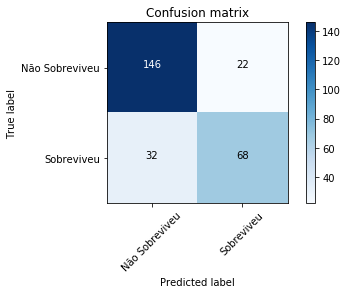

In [69]:
#http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
clf_svc2 = svm.SVC(kernel=clf_svc.best_estimator_.kernel,
                   C=clf_svc.best_estimator_.C,
                   degree=clf_svc.best_estimator_.degree, 
                   gamma=clf_svc.best_estimator_.gamma, 
                   coef0=0.0, 
                   shrinking=True, 
                   probability=False, 
                   tol=0.001, 
                   cache_size=200, 
                   class_weight=None, 
                   verbose=False, 
                   max_iter=-1, 
                   random_state=0).fit(X_traincv, y_traincv)

roc_svc2 = clf_eval(clf_svc2, X_testcv, y_testcv)

For this first classifier, we'll also display the learning curve  
http://scikit-learn.org/stable/modules/generated/sklearn.learning_curve.learning_curve.html  

In [70]:
#http://scikit-learn.org/stable/modules/generated/sklearn.learning_curve.learning_curve.html

def plot_learning_curve(estimator, 
                        title, 
                        X, 
                        y, 
                        ylim=None, 
                        cv=None,
                        n_jobs=-1, 
                        train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure(figsize=(16,8))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = model_selection.learning_curve(estimator, 
                                                            X, y, cv=cv, 
                                                            n_jobs=n_jobs, 
                                                            train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

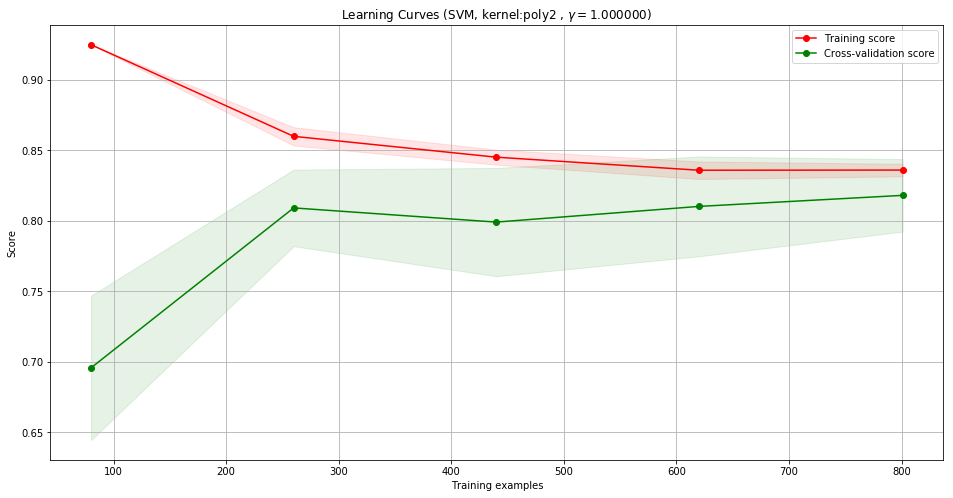

In [71]:
title = 'Learning Curves (SVM, kernel:{1}{0} , $\gamma={2:.6f}$)'.format(clf_svc.best_estimator_.degree,
                                                                         clf_svc.best_estimator_.kernel,
                                                                         clf_svc.best_estimator_.gamma)
graph = plot_learning_curve(clf_svc2, title, X_train, y_train, cv=cv)
#matplotlib.rcdefaults()
#matplotlib.verbose.set_level('silent')
graph.show()

Agora vamos testar outros estimadores:

Classification Report
                precision    recall  f1-score   support

Não Sobreviveu       0.83      0.86      0.85       168
    Sobreviveu       0.75      0.70      0.73       100

   avg / total       0.80      0.80      0.80       268

ROC Score: 0.7815476190476192
Accuracy Score: 0.8022388059701493
Average Precision Score: 0.7823142352752367
f1 Score: 0.7253886010362695
Confusion matrix, without normalization
[[145  23]
 [ 30  70]]


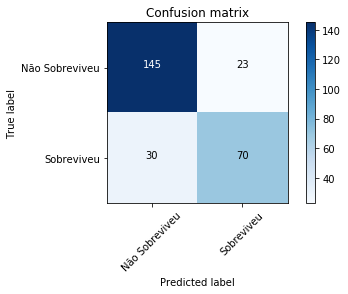

In [72]:
#http://scikit-learn.org/stable/modules/ensemble.html
#http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
#http://blog.yhathq.com/posts/random-forests-in-python.html
#http://www.analyticsvidhya.com/blog/2015/06/tuning-random-forest-model/
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators=300, 
                                criterion='gini', 
                                max_depth=None, 
                                min_samples_split=2, 
                                min_samples_leaf=1, 
                                min_weight_fraction_leaf=0.0, 
                                max_features='auto', 
                                max_leaf_nodes=None, 
                                bootstrap=True, 
                                oob_score=False, 
                                n_jobs=-1, 
                                random_state=0, 
                                verbose=0, 
                                warm_start=False, 
                                class_weight=None).fit(X_traincv, y_traincv)



roc_rf = clf_eval(clf_rf, X_testcv, y_testcv)

Plotting the confidence intervals  
https://github.com/scikit-learn-contrib/forest-confidence-interval  

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:15: RuntimeWarning: invalid value encountered in sqrt
/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:22: RuntimeWarning: invalid value encountered in sqrt


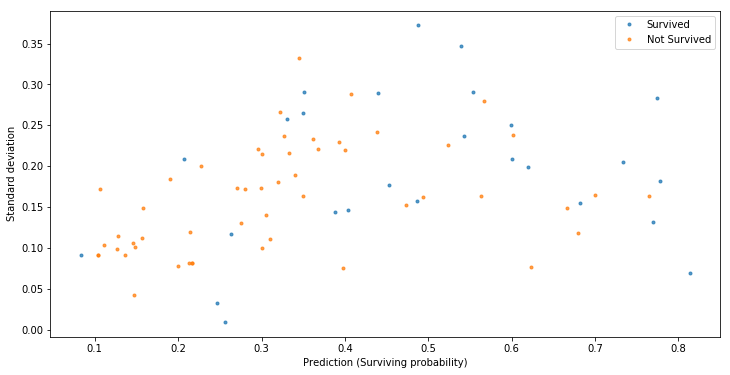

In [73]:
import forestci as fci

y_predicted = clf_rf.predict_proba(X_testcv)

# calculate inbag and unbiased variance
inbag = fci.calc_inbag(X_traincv.shape[0], clf_rf)
unbiased = fci.random_forest_error(clf_rf, inbag,X_traincv, X_testcv)

# Plot forest prediction for survivors and standard deviation for estimates
# Blue points are survivors; Green points are non-survivors
idx = np.where(y_testcv == 1)[0]

plt.figure(figsize=(12,6))
plt.errorbar(y_predicted[idx, 1], 
             np.sqrt(unbiased[idx]),
             fmt='.', 
             alpha=0.75, 
             label='Survived')

idx = np.where(y_testcv == 0)[0]
plt.errorbar(y_predicted[idx, 1],
             np.sqrt(unbiased[idx]),
             fmt='.', 
             alpha=0.75, 
             label='Not Survived')

plt.xlabel('Prediction (Surviving probability)')
plt.ylabel('Standard deviation')
plt.legend()
plt.show()

Classification Report
                precision    recall  f1-score   support

Não Sobreviveu       0.80      0.86      0.83       168
    Sobreviveu       0.73      0.65      0.69       100

   avg / total       0.78      0.78      0.78       268

ROC Score: 0.7535714285714286
Accuracy Score: 0.7798507462686567
Average Precision Score: 0.7554670467885293
f1 Score: 0.6878306878306878
Confusion matrix, without normalization
[[144  24]
 [ 35  65]]


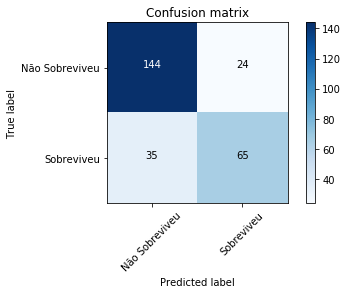

In [74]:
# http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
from sklearn.tree import DecisionTreeClassifier

clf_dtc = DecisionTreeClassifier(criterion='gini', 
                                 splitter='best', 
                                 max_depth=None, 
                                 min_samples_split=2, 
                                 min_samples_leaf=1, 
                                 min_weight_fraction_leaf=0.0, 
                                 max_features=None, 
                                 random_state=0, 
                                 max_leaf_nodes=None, 
                                 class_weight=None, 
                                 presort=False).fit(X_traincv, y_traincv)

roc_dtc = clf_eval(clf_dtc, X_testcv, y_testcv)

Classification Report
                precision    recall  f1-score   support

Não Sobreviveu       0.83      0.83      0.83       168
    Sobreviveu       0.72      0.72      0.72       100

   avg / total       0.79      0.79      0.79       268

ROC Score: 0.7766666666666666
Accuracy Score: 0.7910447761194029
Average Precision Score: 0.7722388059701493
f1 Score: 0.72
Confusion matrix, without normalization
[[140  28]
 [ 28  72]]


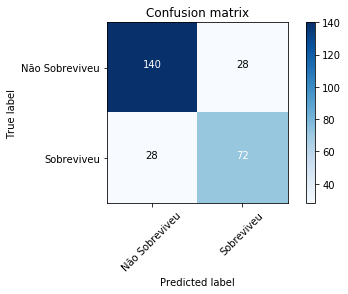

In [75]:
#http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html
from sklearn.ensemble import ExtraTreesClassifier

clf_etc = ExtraTreesClassifier(n_estimators=300,
                               max_depth=None,
                               min_samples_split=2,
                               random_state=0).fit(X_traincv, y_traincv)

roc_etc = clf_eval(clf_etc, X_testcv, y_testcv)

Classification Report
                precision    recall  f1-score   support

Não Sobreviveu       0.85      0.88      0.86       168
    Sobreviveu       0.78      0.74      0.76       100

   avg / total       0.82      0.82      0.82       268

ROC Score: 0.8075
Accuracy Score: 0.8246268656716418
Average Precision Score: 0.8079811468970934
f1 Score: 0.7589743589743589
Confusion matrix, without normalization
[[147  21]
 [ 26  74]]


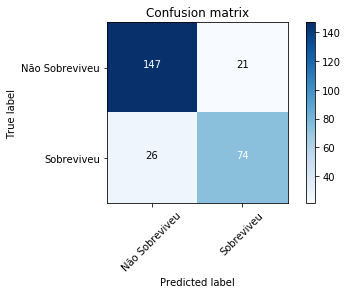

In [76]:
#http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
from sklearn.ensemble import AdaBoostClassifier

clf_abc = AdaBoostClassifier(base_estimator=None,
                             n_estimators=200,
                             learning_rate=0.1,
                             algorithm='SAMME.R',
                             random_state=0).fit(X_traincv, y_traincv)

roc_abc = clf_eval(clf_abc, X_testcv, y_testcv)

Classification Report
                precision    recall  f1-score   support

Não Sobreviveu       0.84      0.86      0.85       168
    Sobreviveu       0.75      0.73      0.74       100

   avg / total       0.81      0.81      0.81       268

ROC Score: 0.7935714285714286
Accuracy Score: 0.8097014925373134
Average Precision Score: 0.7916617941221726
f1 Score: 0.7411167512690355
Confusion matrix, without normalization
[[144  24]
 [ 27  73]]


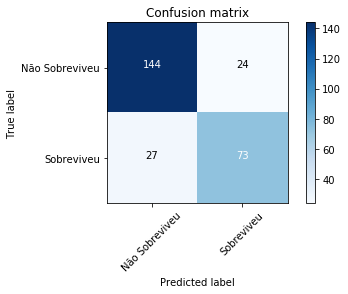

In [77]:
#http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
from sklearn.ensemble import GradientBoostingClassifier

clf_gbc = GradientBoostingClassifier(loss='deviance',
                                     learning_rate=0.1,
                                     n_estimators=200,
                                     subsample=1.0, 
                                     min_samples_split=2, 
                                     min_samples_leaf=1, 
                                     min_weight_fraction_leaf=0.0, 
                                     max_depth=3, 
                                     init=None, 
                                     random_state=0, 
                                     max_features=None, 
                                     verbose=0, 
                                     max_leaf_nodes=None, 
                                     warm_start=False, 
                                     presort='auto').fit(X_traincv, y_traincv)

roc_gbc = clf_eval(clf_gbc, X_testcv, y_testcv)

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Classification Report
                precision    recall  f1-score   support

Não Sobreviveu       0.82      0.91      0.86       168
    Sobreviveu       0.82      0.67      0.74       100

   avg / total       0.82      0.82      0.82       268

ROC Score: 0.7903571428571428
Accuracy Score: 0.8208955223880597
Average Precision Score: 0.805103749544958
f1 Score: 0.7362637362637363
Confusion matrix, without normalization
[[153  15]
 [ 33  67]]


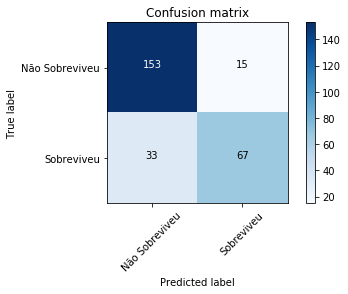

In [78]:
#https://github.com/dmlc/xgboost/tree/master/python-package  
#https://xgboost.readthedocs.io/en/latest/build.html#building-on-ubuntu-debian
#http://xgboost.readthedocs.io/en/latest/build.html#python-package-installation  
#http://xgboost.readthedocs.io/en/latest/parameter.html  
#https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/  
#https://www.kaggle.com/cbrogan/titanic/xgboost-example-python/run/1620  
#http://xgboost.readthedocs.io/en/latest//python/python_api.html#module-xgboost.sklearn

import xgboost

clf_xgb = xgboost.sklearn.XGBClassifier(base_score=0.5,
                                        learning_rate=0.1,
                                        n_estimators=250,
                                        max_delta_step=0,
                                        max_depth=3,
                                        min_child_weight=1,
                                        missing=None,
                                        gamma=0,
                                        subsample=1,
                                        colsample_bylevel=1,
                                        colsample_bytree=1,
                                        objective= 'binary:logitraw',
                                        #objective='multi:softprob',
                                        reg_alpha=0, 
                                        reg_lambda=1,
                                        nthread=-1,
                                        scale_pos_weight=1,
                                        seed=0,
                                        silent=False,).fit(X_traincv, y_traincv)

roc_xgb = clf_eval(clf_xgb, X_testcv, y_testcv)

Classification Report
                precision    recall  f1-score   support

Não Sobreviveu       0.82      0.83      0.83       168
    Sobreviveu       0.71      0.70      0.71       100

   avg / total       0.78      0.78      0.78       268

ROC Score: 0.7666666666666667
Accuracy Score: 0.7835820895522388
Average Precision Score: 0.7631130063965885
f1 Score: 0.7070707070707072
Confusion matrix, without normalization
[[140  28]
 [ 30  70]]


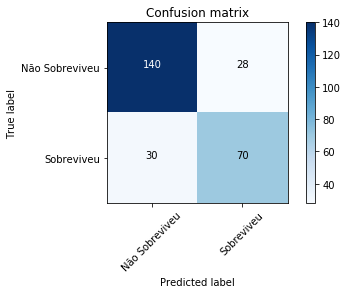

In [79]:
#http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
from sklearn.linear_model import SGDClassifier

clf_sgdc = SGDClassifier(loss='hinge',
                         penalty='l2', 
                         alpha=0.0001,
                         l1_ratio=0.15, 
                         fit_intercept=True,
                         n_iter=200, 
                         shuffle=True,
                         verbose=0,
                         epsilon=0.1,
                         n_jobs=-1,
                         random_state=0,
                         learning_rate='optimal',
                         eta0=0.0, 
                         power_t=0.5,
                         class_weight=None,
                         warm_start=False, 
                         average=False).fit(X_traincv, y_traincv)

roc_sgdc = clf_eval(clf_sgdc, X_testcv, y_testcv)

Classification Report
                precision    recall  f1-score   support

Não Sobreviveu       0.84      0.85      0.84       168
    Sobreviveu       0.74      0.72      0.73       100

   avg / total       0.80      0.80      0.80       268

ROC Score: 0.7855952380952381
Accuracy Score: 0.8022388059701493
Average Precision Score: 0.7833728265887059
f1 Score: 0.7309644670050761
Confusion matrix, without normalization
[[143  25]
 [ 28  72]]


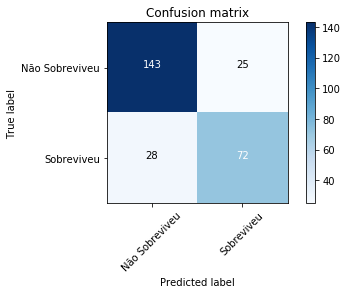

In [80]:
#http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html
from sklearn.linear_model import RidgeClassifier

clf_rdg = RidgeClassifier(alpha=1.0, 
                          fit_intercept=True, 
                          normalize=False, 
                          copy_X=True, 
                          max_iter=None, 
                          tol=0.001, 
                          class_weight=None, 
                          solver='auto', 
                          random_state=0).fit(X_traincv, y_traincv)

roc_rdg = clf_eval(clf_rdg, X_testcv, y_testcv)

Classification Report
                precision    recall  f1-score   support

Não Sobreviveu       0.82      0.84      0.83       168
    Sobreviveu       0.72      0.68      0.70       100

   avg / total       0.78      0.78      0.78       268

ROC Score: 0.7596428571428572
Accuracy Score: 0.7798507462686567
Average Precision Score: 0.7575962293794187
f1 Score: 0.6974358974358974
Confusion matrix, without normalization
[[141  27]
 [ 32  68]]


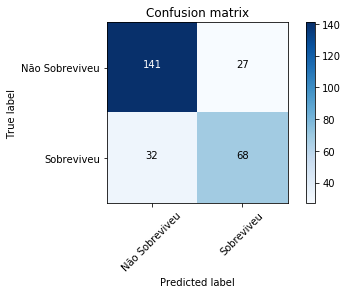

In [81]:
#http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html#sklearn.linear_model.Perceptron
from sklearn.linear_model import Perceptron

clf_pcp = Perceptron(penalty=None,
                     alpha=0.0001,
                     fit_intercept=True,
                     n_iter=200,
                     shuffle=True,
                     verbose=0,
                     eta0=1.0,
                     n_jobs=-1, 
                     random_state=0, 
                     class_weight=None, 
                     warm_start=False).fit(X_traincv, y_traincv)

roc_pcp = clf_eval(clf_pcp, X_testcv, y_testcv)

Classification Report
                precision    recall  f1-score   support

Não Sobreviveu       0.83      0.79      0.81       168
    Sobreviveu       0.67      0.73      0.70       100

   avg / total       0.77      0.76      0.77       268

ROC Score: 0.7578571428571428
Accuracy Score: 0.7649253731343284
Average Precision Score: 0.7502355196494591
f1 Score: 0.6985645933014354
Confusion matrix, without normalization
[[132  36]
 [ 27  73]]


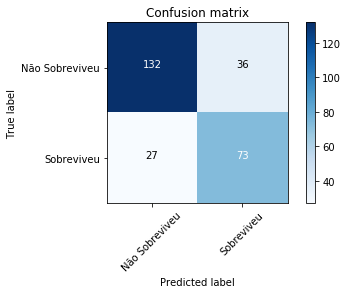

In [82]:
#http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.PassiveAggressiveClassifier.html
from sklearn.linear_model import PassiveAggressiveClassifier

clf_pac = PassiveAggressiveClassifier(C=1.0, 
                                      fit_intercept=True, 
                                      n_iter=200, 
                                      shuffle=True, 
                                      verbose=0, 
                                      loss='hinge', 
                                      n_jobs=-1, 
                                      random_state=0, 
                                      warm_start=False, 
                                      class_weight=None).fit(X_traincv, y_traincv)

roc_pac = clf_eval(clf_pac, X_testcv, y_testcv)

Classification Report
                precision    recall  f1-score   support

Não Sobreviveu       0.84      0.86      0.85       168
    Sobreviveu       0.75      0.72      0.73       100

   avg / total       0.80      0.81      0.81       268

ROC Score: 0.7885714285714286
Accuracy Score: 0.8059701492537313
Average Precision Score: 0.7872388059701493
f1 Score: 0.7346938775510204
Confusion matrix, without normalization
[[144  24]
 [ 28  72]]


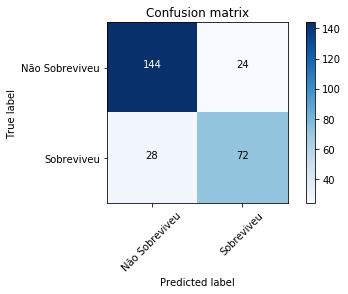

In [83]:
#http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(penalty='l2',
                            dual=False, 
                            tol=0.0001, 
                            C=1.0, 
                            fit_intercept=True, 
                            intercept_scaling=1, 
                            class_weight=None, 
                            random_state=0, 
                            solver='liblinear', 
                            max_iter=100, 
                            multi_class='ovr', 
                            verbose=0, 
                            warm_start=False, 
                            n_jobs=-1).fit(X_traincv, y_traincv)

roc_lr = clf_eval(clf_lr, X_testcv, y_testcv)

Classification Report
                precision    recall  f1-score   support

Não Sobreviveu       0.84      0.76      0.79       168
    Sobreviveu       0.65      0.75      0.69       100

   avg / total       0.77      0.75      0.76       268

ROC Score: 0.7529761904761904
Accuracy Score: 0.753731343283582
Average Precision Score: 0.7449176531137417
f1 Score: 0.6944444444444444
Confusion matrix, without normalization
[[127  41]
 [ 25  75]]


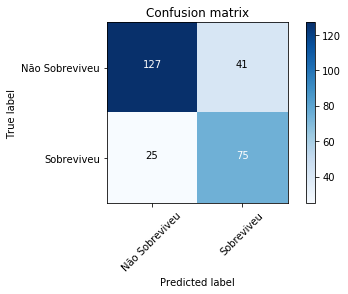

In [84]:
#http://scikit-learn.org/stable/modules/naive_bayes.html
#http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html
from sklearn.naive_bayes import GaussianNB

clf_gnb = GaussianNB().fit(X_traincv, y_traincv)

roc_gnb = clf_eval(clf_gnb, X_testcv, y_testcv)

Classification Report
                precision    recall  f1-score   support

Não Sobreviveu       0.80      0.79      0.79       168
    Sobreviveu       0.65      0.66      0.66       100

   avg / total       0.74      0.74      0.74       268

ROC Score: 0.7258333333333333
Accuracy Score: 0.7425373134328358
Average Precision Score: 0.7201655090882223
f1 Score: 0.6567164179104478
Confusion matrix, without normalization
[[133  35]
 [ 34  66]]


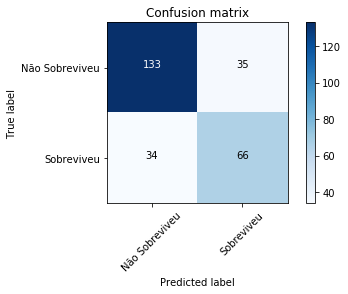

In [85]:
#http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html
from sklearn.naive_bayes import BernoulliNB

clf_bnb = BernoulliNB(alpha=1.0, 
                     binarize=0.0, 
                     fit_prior=True, 
                     class_prior=None).fit(X_traincv, y_traincv)

roc_bnb = clf_eval(clf_bnb, X_testcv, y_testcv)

Classification Report
                precision    recall  f1-score   support

Não Sobreviveu       0.82      0.89      0.86       168
    Sobreviveu       0.79      0.68      0.73       100

   avg / total       0.81      0.81      0.81       268

ROC Score: 0.7864285714285716
Accuracy Score: 0.8134328358208955
Average Precision Score: 0.7950503297466158
f1 Score: 0.7311827956989247
Confusion matrix, without normalization
[[150  18]
 [ 32  68]]


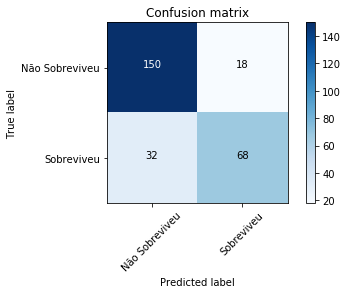

In [86]:
from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier(n_neighbors=5,
                               weights='uniform', 
                               algorithm='auto', 
                               leaf_size=30, 
                               p=2, 
                               metric='minkowski', 
                               metric_params=None, 
                               n_jobs=1).fit(X_traincv, y_traincv)

roc_knn = clf_eval(clf_knn, X_testcv, y_testcv)

Classification Report
                precision    recall  f1-score   support

Não Sobreviveu       0.82      0.88      0.85       168
    Sobreviveu       0.77      0.67      0.72       100

   avg / total       0.80      0.80      0.80       268

ROC Score: 0.7754761904761904
Accuracy Score: 0.8022388059701493
Average Precision Score: 0.7816246354434723
f1 Score: 0.716577540106952
Confusion matrix, without normalization
[[148  20]
 [ 33  67]]


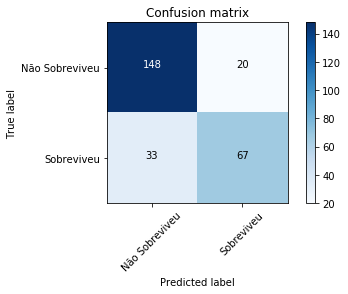

In [87]:
from sklearn.ensemble import BaggingClassifier

clf_bgc = BaggingClassifier().fit(X_traincv, y_traincv)

roc_bgc = clf_eval(clf_bgc, X_testcv, y_testcv)

#### Keras (with TensorFlow / Theano backends)

Using Theano backend.


Couldn't import dot_parser, loading of dot files will not be possible.


Using cuDNN version 5103 on context None
Mapped name None to device cuda: Quadro K4200 (0000:08:00.0)


Keras using theano backend
623 train samples
268 test samples
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_1 (Dense)                  (None, 200)           2400        dense_input_1[0][0]              
____________________________________________________________________________________________________
dropout_1 (Dropout)              (None, 200)           0           dense_1[0][0]                    
____________________________________________________________________________________________________
dense_2 (Dense)                  (None, 200)           40200       dropout_1[0][0]                  
____________________________________________________________________________________________________
dropout_2 (Dropout)              (None, 200)           0           dense_2[0][0]                    
_____________________________

/usr/local/lib/python3.5/dist-packages/theano/tensor/basic.py:2140: UserWarning: theano.tensor.round() changed its default from `half_away_from_zero` to `half_to_even` to have the same default as NumPy. Use the Theano flag `warn.round=False` to disable this warning.
  "theano.tensor.round() changed its default from"


Train on 623 samples, validate on 268 samples
Epoch 1/10
623/623 [==============================] - 0s - loss: 0.6142 - acc: 0.6726 - val_loss: 0.4912 - val_acc: 0.8172
Epoch 2/10
623/623 [==============================] - 0s - loss: 0.4830 - acc: 0.7849 - val_loss: 0.4488 - val_acc: 0.8022
Epoch 3/10
623/623 [==============================] - 0s - loss: 0.4682 - acc: 0.7961 - val_loss: 0.4367 - val_acc: 0.8209
Epoch 4/10
623/623 [==============================] - 0s - loss: 0.4291 - acc: 0.8218 - val_loss: 0.4326 - val_acc: 0.8209
Epoch 5/10
623/623 [==============================] - 0s - loss: 0.4265 - acc: 0.8283 - val_loss: 0.4340 - val_acc: 0.8209
Epoch 6/10
623/623 [==============================] - 0s - loss: 0.4296 - acc: 0.8170 - val_loss: 0.4339 - val_acc: 0.8172
Epoch 7/10
623/623 [==============================] - 0s - loss: 0.4148 - acc: 0.8299 - val_loss: 0.4308 - val_acc: 0.8172
Epoch 8/10
623/623 [==============================] - 0s - loss: 0.4079 - acc: 0.8283 - val_l

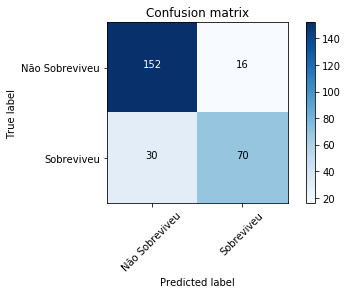

In [88]:
# https://elitedatascience.com/keras-tutorial-deep-learning-in-python
# http://machinelearningmastery.com/tutorial-first-neural-network-python-keras/
# https://www.kaggle.com/cstahl12/titanic/titanic-with-keras

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD, RMSprop
from keras.utils.np_utils import to_categorical

print('Keras using {} backend'.format(keras.backend.backend()))  #https://keras.io/backend/

batch_size = 128
num_classes = 2
epochs = 20

x_train_kr = X_traincv.astype('float32') 
x_test_kr = X_testcv.astype('float32')

print(x_train_kr.shape[0], 'train samples')
print(x_test_kr.shape[0], 'test samples')

y_train_kr = y_traincv
y_test_kr = y_testcv

# convert class vectors to binary class matrices for categorical cross_entropy
#y_train_kr = to_categorical(y_traincv)
#y_test_kr = to_categorical(y_testcv)

model = Sequential()
model.add(Dense(input_dim=x_train_kr.shape[1], activation='relu', output_dim=200))
model.add(Dropout(0.2))
model.add(Dense(input_dim=200, activation='relu', output_dim=200))
model.add(Dropout(0.2))
model.add(Dense(input_dim=200, activation='relu', output_dim=24)) #activation='softmax'
model.add(Dropout(0.2))
model.add(Dense(input_dim=24,  activation='sigmoid', output_dim=1)) #kernel_initializer='uniform',
model.summary()


model.compile(loss='binary_crossentropy',
              #loss='categorical_crossentropy',
              #loss='mean_squared_error',
              optimizer=RMSprop(), 
              #optimizer=SGD(lr=0.001),
              metrics=['accuracy'])

history = model.fit(x_train_kr, y_train_kr,
                    batch_size=batch_size,
                    #epochs=epochs,
                    verbose=1,
                    validation_data=(x_test_kr, y_test_kr))

score = model.evaluate(x_test_kr, y_test_kr, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


y_pred = model.predict_classes(x_test_kr) #y_pred = np.around(model.predict(x_test_kr)[:,1])
#y_test_kr = y_test_kr[:,1] #for categorical cross_entropy
clf_matrix = confusion_matrix(y_test_kr, y_pred)
print('Classification Report')
print(classification_report(y_test_kr, y_pred, target_names=['Não Sobreviveu', 'Sobreviveu']))
print('ROC Score: {}'.format(roc_auc_score(y_test_kr, y_pred)))
print('Accuracy Score: {}'.format(accuracy_score(y_test_kr, y_pred)))
print('Average Precision Score: {}'.format(average_precision_score(y_test_kr, y_pred)))
print('f1 Score: {}'.format(f1_score(y_test_kr, y_pred)))
plot_confusion_matrix(clf_matrix, classes=['Não Sobreviveu', 'Sobreviveu'])
roc_keras = roc_auc_score(y_test_kr, y_pred)

#### Theano Neural Networks (with Lasagne and Nolearn)

# Neural Network with 43002 learnable parameters

## Layer information

  #  name        size
---  --------  ------
  0  input         11
  1  dense0       200
  2  dropout1     200
  3  dense1       200
  4  output         2

  epoch    trn loss    val loss    trn/val    valid acc  dur
-------  ----------  ----------  ---------  -----------  -----
      1     0.69588     0.68461    1.01647      0.54762  0.00s
      2     0.68553     0.66598    1.02937      0.61111  0.00s
      3     0.66922     0.64951    1.03035      0.64286  0.00s
      4     0.64205     0.63535    1.01053      0.69048  0.00s
      5     0.62655     0.62263    1.00629      0.73016  0.00s
      6     0.61518     0.61173    1.00565      0.75397  0.00s
      7     0.60679     0.60111    1.00944      0.78571  0.00s
      8     0.58683     0.59178    0.99163      0.78571  0.00s
      9     0.57754     0.58290    0.99081      0.78571  0.00s
     10     0.56915     0.57492    0.98997      0.79365  0.00s
     11     0.56014

    105     0.41845     0.44161    0.94757      0.80952  0.00s
    106     0.42145     0.44129    0.95502      0.80952  0.00s
    107     0.42026     0.44061    0.95382      0.80952  0.00s
    108     0.41876     0.44051    0.95062      0.80952  0.00s
    109     0.40312     0.44034    0.91547      0.80952  0.00s
    110     0.41337     0.44005    0.93937      0.80952  0.00s
    111     0.42088     0.43951    0.95763      0.80952  0.00s
    112     0.42183     0.43885    0.96123      0.80952  0.00s
    113     0.41209     0.43870    0.93934      0.80952  0.00s
    114     0.41105     0.43830    0.93784      0.80952  0.00s
    115     0.41058     0.43803    0.93733      0.80952  0.00s
    116     0.41051     0.43781    0.93766      0.80952  0.00s
    117     0.40983     0.43747    0.93684      0.80952  0.00s
    118     0.40951     0.43694    0.93722      0.80952  0.00s
    119     0.41079     0.43678    0.94050      0.80952  0.00s
    120     0.40779     0.43636    0.93453      0.80952

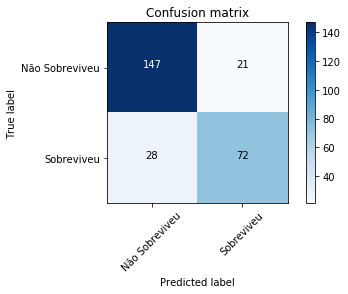

In [89]:
#sudo -H pip3 install --upgrade theano nolearn
#sudo -H pip3 install git+https://github.com/Lasagne/Lasagne.git

#http://stackoverflow.com/questions/30034492/does-nolearn-lasagne-support-python-3
#https://gist.github.com/dnouri/fe855653e9757e1ce8c4
#https://github.com/dnouri/nolearn/issues/62

#https://github.com/dnouri/nolearn/blob/master/nolearn/lasagne/base.py
#https://github.com/Lasagne/Lasagne/blob/master/lasagne/objectives.py

#http://nbviewer.ipython.org/github/ottogroup/kaggle/blob/master/Otto_Group_Competition.ipynb
#http://danielnouri.org/notes/2014/12/17/using-convolutional-neural-nets-to-detect-facial-keypoints-tutorial/

#https://github.com/IssamLaradji/NeuralNetworks/tree/master/multilayer_perceptron
#https://github.com/fchollet/keras

import lasagne
import nolearn
from nolearn.lasagne import NeuralNet, BatchIterator

clf_lsgn_layers = [('input', lasagne.layers.InputLayer),
                  #('input', lasagne.layers.InputLayer(shape=(None, X.shape[1])))
                  #('dropout0', lasagne.layers.DropoutLayer),
                  ('dense0', lasagne.layers.DenseLayer),
                  ('dropout1', lasagne.layers.DropoutLayer),#
                  ('dense1', lasagne.layers.DenseLayer),
                  #('dropout2', lasagne.layers.DropoutLayer),#
                  ('output', lasagne.layers.DenseLayer)]

#l = InputLayer(shape=(None, X.shape[1]))
#l = DenseLayer(l, num_units=len(np.unique(y)), nonlinearity=softmax)
#net = NeuralNet(l, update_learning_rate=0.01)

clf_lsgn = nolearn.lasagne.NeuralNet(layers=clf_lsgn_layers,
                                     input_shape=(None, X_traincv.shape[1]), #num_features
                                     #dropout0_p=0.5, #0.15                 
                                     dense0_num_units=200,
                                     dropout1_p=0.25,
                                     dense1_num_units=200,
                                     #dropout2_p=0.25,
                                     output_num_units=len(np.unique(y_traincv)), #num_classes
                                     output_nonlinearity=lasagne.nonlinearities.softmax,
                                     #update=lasagne.updates.adagrad,
                                     update=lasagne.updates.nesterov_momentum,
                                     update_momentum=0.5, #0.9 #only used with nesterov_momentum
                                     update_learning_rate=0.01,
                                     train_split=nolearn.lasagne.TrainSplit(eval_size=0.2), #split
                                     verbose=1,
                                     max_epochs=200, #To tune,verify the behaviour of outputs
                                     )

clf_lsgn.fit(X_traincv.astype(np.float32), y_traincv.astype(np.int32))

roc_lsgn = clf_eval(clf_lsgn, X_testcv.astype(np.float32), y_testcv.astype(np.int32))

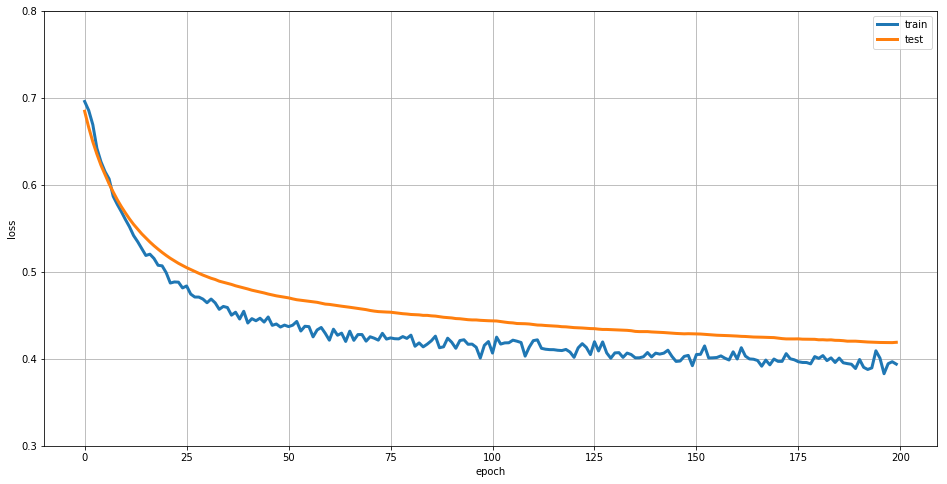

In [90]:
train_loss = np.array([i["train_loss"] for i in clf_lsgn.train_history_])
valid_loss = np.array([i["valid_loss"] for i in clf_lsgn.train_history_])
plt.figure(figsize=(16,8))
plt.plot(train_loss, linewidth=3, label="train")
plt.plot(valid_loss, linewidth=3, label="test")
plt.grid()
plt.legend()
plt.xlabel("epoch")
plt.ylabel("loss")
#plt.ylim(1e-1, 1e1)
plt.ylim(0.3, 0.8)
#plt.yscale("log")
plt.show()

#### Theano Neural Networks (with  Lasagne layers)

In [91]:
#http://lasagne.readthedocs.org/en/latest/
#http://lasagne.readthedocs.org/en/latest/user/tutorial.html
#https://github.com/Lasagne
#https://martin-thoma.com/lasagne-for-python-newbies/
#http://deeplearning.net/tutorial/
#http://deeplearning.net/software/theano/tutorial/
#http://cs231n.github.io/
#http://neuralnetworksanddeeplearning.com/

import theano
import theano.tensor as T
#import lasagne

def build_mlp(input_var=None):
    l_in = lasagne.layers.InputLayer(shape=X_traincv.shape, input_var=input_var)
    l_in_drop = lasagne.layers.DropoutLayer(l_in, p=0.2)
    l_hid1 = lasagne.layers.DenseLayer(l_in_drop, 
                                       num_units=800,
                                       nonlinearity=lasagne.nonlinearities.rectify,
                                       W=lasagne.init.GlorotUniform())
    l_hid1_drop = lasagne.layers.DropoutLayer(l_hid1, p=0.6)
    l_hid2 = lasagne.layers.DenseLayer(l_hid1_drop,
                                       num_units=800,
                                       nonlinearity=lasagne.nonlinearities.rectify)
    l_hid2_drop = lasagne.layers.DropoutLayer(l_hid2, p=0.6)
    l_out = lasagne.layers.DenseLayer(l_hid2_drop,
                                      num_units=10,
                                      nonlinearity=lasagne.nonlinearities.softmax)
    return l_out

def build_custom_mlp(input_var=None, depth=2, width=800, drop_input=.2, drop_hidden=.5):
    # Input layer and dropout (with shortcut `dropout` for `DropoutLayer`):
    network = lasagne.layers.InputLayer(shape=X_traincv.shape, input_var=input_var)
    if drop_input:
        network = lasagne.layers.dropout(network, p=drop_input)
    
    # Hidden layers and dropout:
    nonlin = lasagne.nonlinearities.rectify
    for _ in range(depth):
        network = lasagne.layers.DenseLayer(network, 
                                            width, 
                                            nonlinearity=nonlin)
    if drop_hidden:
        network = lasagne.layers.dropout(network, p=drop_hidden)
    
    # Output layer:
    softmax = lasagne.nonlinearities.softmax
    network = lasagne.layers.DenseLayer(network, 10, nonlinearity=softmax)
    return network

def build_cnn(input_var=None):
    network = lasagne.layers.InputLayer(shape=X_traincv.shape,
                                        input_var=input_var)
    network = lasagne.layers.Conv2DLayer(network,
                                         num_filters=32,
                                         filter_size=(5, 5),
                                         nonlinearity=lasagne.nonlinearities.rectify,
                                         W=lasagne.init.GlorotUniform())
    network = lasagne.layers.MaxPool2DLayer(network, pool_size=(2, 2))
    network = lasagne.layers.Conv2DLayer(network, 
                                         num_filters=32,
                                         filter_size=(5, 5),
                                         nonlinearity=lasagne.nonlinearities.rectify)
    network = lasagne.layers.MaxPool2DLayer(network, pool_size=(2, 2))
    network = lasagne.layers.DenseLayer(lasagne.layers.dropout(network, p=.5),
                                        num_units=256,
                                        nonlinearity=lasagne.nonlinearities.rectify)
    network = lasagne.layers.DenseLayer(lasagne.layers.dropout(network, p=.5),
                                        num_units=10,
                                        nonlinearity=lasagne.nonlinearities.softmax)
    return network

In [92]:
# Prepare Theano variables for inputs and targets
input_var = T.matrix('inputs')
target_var = T.ivector('targets')

# Create neural network model
network = build_mlp(input_var)
prediction = lasagne.layers.get_output(network)
loss = lasagne.objectives.categorical_crossentropy(prediction, target_var)
loss = loss.mean()
params = lasagne.layers.get_all_params(network, trainable=True)
updates = lasagne.updates.nesterov_momentum(loss,
                                            params,
                                            learning_rate=0.01, 
                                            momentum=0.9)
# Monitoring progress during training
test_prediction = lasagne.layers.get_output(network, deterministic=True)
test_loss = lasagne.objectives.categorical_crossentropy(test_prediction, target_var)
test_loss = test_loss.mean()
test_acc = T.mean(T.eq(T.argmax(test_prediction, axis=1), target_var),
                  dtype=theano.config.floatX)

# Compilation
train_fn = theano.function([input_var, target_var], loss, updates=updates, allow_input_downcast=True)
val_fn = theano.function([input_var, target_var], [test_loss, test_acc], allow_input_downcast=True)

In [93]:
num_epochs = 150
for epoch in range(num_epochs):
    # In each epoch, we do a full pass over the training data:
    train_err = 0
    start_time = time.time()
    inputs, targets = X_traincv, y_traincv
    train_err += train_fn(inputs, targets)
    
    # And a full pass over the validation data:
    val_err = 0
    val_acc = 0
    inputs, targets = X_testcv, y_testcv
    err, acc = val_fn(inputs, targets)
    val_err += err
    val_acc += acc
    
    # Then we print the results for this epoch:
    print("Epoch {} of {} took {:.3f}s".format(epoch + 1, num_epochs, time.time() - start_time))
    print("  training loss:\t\t{:.6f}".format(train_err))
    print("  validation loss:\t\t{:.6f}".format(val_err))
    print("  validation accuracy:\t\t{:.2f} %".format(val_acc * 100))

Epoch 1 of 150 took 0.008s
  training loss:		2.345887
  validation loss:		2.266652
  validation accuracy:		5.22 %
Epoch 2 of 150 took 0.007s
  training loss:		2.271814
  validation loss:		2.182625
  validation accuracy:		42.91 %
Epoch 3 of 150 took 0.007s
  training loss:		2.178304
  validation loss:		2.080512
  validation accuracy:		67.91 %
Epoch 4 of 150 took 0.007s
  training loss:		2.073236
  validation loss:		1.964958
  validation accuracy:		69.40 %
Epoch 5 of 150 took 0.007s
  training loss:		1.912981
  validation loss:		1.841417
  validation accuracy:		70.90 %
Epoch 6 of 150 took 0.007s
  training loss:		1.763990
  validation loss:		1.713557
  validation accuracy:		71.27 %
Epoch 7 of 150 took 0.006s
  training loss:		1.616024
  validation loss:		1.584693
  validation accuracy:		70.90 %
Epoch 8 of 150 took 0.007s
  training loss:		1.474984
  validation loss:		1.458237
  validation accuracy:		71.27 %
Epoch 9 of 150 took 0.007s
  training loss:		1.355901
  validation loss:		1.33742

Epoch 91 of 150 took 0.007s
  training loss:		0.472913
  validation loss:		0.439189
  validation accuracy:		82.09 %
Epoch 92 of 150 took 0.006s
  training loss:		0.479056
  validation loss:		0.439303
  validation accuracy:		82.09 %
Epoch 93 of 150 took 0.006s
  training loss:		0.481084
  validation loss:		0.439258
  validation accuracy:		82.09 %
Epoch 94 of 150 took 0.006s
  training loss:		0.502398
  validation loss:		0.439069
  validation accuracy:		81.72 %
Epoch 95 of 150 took 0.006s
  training loss:		0.475534
  validation loss:		0.439109
  validation accuracy:		81.72 %
Epoch 96 of 150 took 0.006s
  training loss:		0.459170
  validation loss:		0.438969
  validation accuracy:		81.72 %
Epoch 97 of 150 took 0.006s
  training loss:		0.492174
  validation loss:		0.438768
  validation accuracy:		81.72 %
Epoch 98 of 150 took 0.006s
  training loss:		0.475451
  validation loss:		0.438607
  validation accuracy:		81.72 %
Epoch 99 of 150 took 0.006s
  training loss:		0.496133
  validation loss

In [94]:
test_err = 0
test_acc = 0
inputs, targets = X_testcv, y_testcv
err, acc = val_fn(inputs, targets)
test_err += err
test_acc += acc
print("Final results:")
print("  test loss:\t\t\t{:.6f}".format(test_err))
print("  test accuracy:\t\t{:.2f} %".format(test_acc * 100))

Final results:
  test loss:			0.436571
  test accuracy:		82.09 %


#### Genetic Algorithms

In [95]:
# https://github.com/rhiever/tpot
# https://github.com/rhiever/tpot/blob/master/tutorials/Titanic_Kaggle.ipynb

from tpot import TPOTClassifier

Optimization Progress: 187pipeline [01:14,  3.59pipeline/s]                  

Generation 1 - Current best internal CV score: 0.8298277521761392


Optimization Progress: 282pipeline [02:01,  3.78pipeline/s]

Generation 2 - Current best internal CV score: 0.8298277521761392


Optimization Progress: 375pipeline [03:12,  2.15pipeline/s]                   

Generation 3 - Current best internal CV score: 0.8315047619047619


Optimization Progress: 472pipeline [04:58,  2.23pipeline/s]                   

Generation 4 - Current best internal CV score: 0.8315047619047619


Optimization Progress: 570pipeline [06:29,  2.17pipeline/s]                   

Generation 5 - Current best internal CV score: 0.8315047619047619


Optimization Progress: 666pipeline [07:58,  2.35pipeline/s]                   

Generation 6 - Current best internal CV score: 0.8410541730670763


Optimization Progress: 761pipeline [09:19,  2.47pipeline/s]                   

Generation 7 - Current best internal CV score: 0.8410541730670763


Optimization Progress: 857pipeline [10:33,  2.64pipeline/s]                   

Generation 8 - Current best internal CV score: 0.8410541730670763


Optimization Progress: 949pipeline [11:43,  2.98pipeline/s]                   

Generation 9 - Current best internal CV score: 0.8410541730670763


Optimization Progress: 1049pipeline [12:45,  2.91pipeline/s]                   

Generation 10 - Current best internal CV score: 0.8410541730670763


Optimization Progress: 1146pipeline [13:57,  2.72pipeline/s]                    

Generation 11 - Current best internal CV score: 0.8410541730670763


Optimization Progress: 1243pipeline [15:17,  2.42pipeline/s]                    

Generation 12 - Current best internal CV score: 0.8410541730670763


Optimization Progress: 1342pipeline [16:28,  2.74pipeline/s]                    

Generation 13 - Current best internal CV score: 0.8410541730670763


Optimization Progress: 1436pipeline [17:44,  1.95pipeline/s]                    

Generation 14 - Current best internal CV score: 0.8410541730670763


Optimization Progress: 1528pipeline [18:53,  2.96pipeline/s]                    

Generation 15 - Current best internal CV score: 0.8410541730670763


Optimization Progress: 1616pipeline [19:38,  4.03pipeline/s]                    

Generation 16 - Current best internal CV score: 0.8410541730670763


Optimization Progress: 1711pipeline [20:11,  2.70pipeline/s]                    

Generation 17 - Current best internal CV score: 0.8410541730670763


Optimization Progress: 100%|█████████▉| 1796/1800 [20:37<00:01,  2.65pipeline/s]

Generation 18 - Current best internal CV score: 0.8410541730670763


Optimization Progress:  99%|█████████▉| 1883/1900 [21:08<00:04,  3.50pipeline/s]

Generation 19 - Current best internal CV score: 0.8410541730670763


Optimization Progress: 1974pipeline [21:41,  3.13pipeline/s]                    

Generation 20 - Current best internal CV score: 0.8410541730670763


Optimization Progress: 2064pipeline [22:12,  4.06pipeline/s]

Generation 21 - Current best internal CV score: 0.8410541730670763


Optimization Progress: 2153pipeline [22:46,  3.29pipeline/s]                    

Generation 22 - Current best internal CV score: 0.8410541730670763


Optimization Progress: 2248pipeline [23:39,  2.52pipeline/s]                    

Generation 23 - Current best internal CV score: 0.8410541730670763


Optimization Progress: 2344pipeline [24:23,  3.08pipeline/s]                    

Generation 24 - Current best internal CV score: 0.8410541730670763


Optimization Progress: 2434pipeline [25:16,  3.56pipeline/s]                    

Generation 25 - Current best internal CV score: 0.8410541730670763


Optimization Progress: 2523pipeline [25:52,  4.19pipeline/s]                    

Generation 26 - Current best internal CV score: 0.8410541730670763


Optimization Progress: 2605pipeline [26:18,  4.30pipeline/s]                    

Generation 27 - Current best internal CV score: 0.8426283666154634


Optimization Progress:  99%|█████████▉| 2686/2700 [26:39<00:08,  1.70pipeline/s]

Generation 28 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 2766pipeline [27:00,  3.10pipeline/s]                    

Generation 29 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 2855pipeline [27:22,  3.99pipeline/s]

Generation 30 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 2941pipeline [27:38,  4.48pipeline/s]                    

Generation 31 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 3023pipeline [27:54,  4.78pipeline/s]                    

Generation 32 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 3104pipeline [28:10,  3.92pipeline/s]                    

Generation 33 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 100%|█████████▉| 3186/3200 [28:32<00:03,  4.62pipeline/s]

Generation 34 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 3273pipeline [28:51,  4.13pipeline/s]                    

Generation 35 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 3346pipeline [29:06,  4.32pipeline/s]

Generation 36 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 3429pipeline [29:25,  3.89pipeline/s]                    

Generation 37 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 3508pipeline [29:46,  3.23pipeline/s]                    

Generation 38 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 100%|█████████▉| 3594/3600 [30:12<00:01,  4.57pipeline/s]

Generation 39 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 3680pipeline [30:34,  3.43pipeline/s]                    

Generation 40 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 3761pipeline [31:04,  2.07pipeline/s]

Generation 41 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 3846pipeline [31:38,  3.32pipeline/s]                    

Generation 42 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 3928pipeline [32:09,  4.04pipeline/s]                    

Generation 43 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 4005pipeline [32:23,  4.53pipeline/s]                    

Generation 44 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 100%|█████████▉| 4082/4100 [32:42<00:03,  4.78pipeline/s]

Generation 45 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 4156pipeline [32:57,  6.82pipeline/s]                    

Generation 46 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 4228pipeline [33:16,  3.34pipeline/s]                    

Generation 47 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 4310pipeline [33:36,  2.66pipeline/s]                    

Generation 48 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 100%|█████████▉| 4381/4400 [33:57<00:07,  2.70pipeline/s]

Generation 49 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 4458pipeline [34:25,  3.63pipeline/s]                    

Generation 50 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 4531pipeline [34:44,  3.32pipeline/s]

Generation 51 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 4605pipeline [34:57,  3.79pipeline/s]                    

Generation 52 - Current best internal CV score: 0.8426283666154634


Optimization Progress:  99%|█████████▉| 4674/4700 [35:15<00:11,  2.21pipeline/s]

Generation 53 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 4748pipeline [35:27,  1.97pipeline/s]                    

Generation 54 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 4817pipeline [35:41,  2.66pipeline/s]                    

Generation 55 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 100%|█████████▉| 4883/4900 [35:57<00:06,  2.64pipeline/s]

Generation 56 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 4953pipeline [36:09,  3.06pipeline/s]                    

Generation 57 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 5028pipeline [36:26,  1.29pipeline/s]

Generation 58 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 100%|█████████▉| 5093/5100 [36:49<00:04,  1.70pipeline/s]

Generation 59 - Current best internal CV score: 0.8426283666154634


Optimization Progress:  99%|█████████▉| 5165/5200 [37:13<00:14,  2.45pipeline/s]

Generation 60 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 5237pipeline [37:26,  3.87pipeline/s]                    

Generation 61 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 5302pipeline [37:40,  2.15pipeline/s]                    

Generation 62 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 100%|█████████▉| 5378/5400 [38:00<00:06,  3.18pipeline/s]

Generation 63 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 5453pipeline [38:19,  4.91pipeline/s]                    

Generation 64 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 5527pipeline [38:33,  5.39pipeline/s]

Generation 65 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 5602pipeline [38:54,  3.22pipeline/s]01,  3.22pipeline/s]

Generation 66 - Current best internal CV score: 0.8426283666154634


Optimization Progress:  99%|█████████▉| 5668/5700 [39:12<00:11,  2.84pipeline/s]

Generation 67 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 5748pipeline [39:32,  2.42pipeline/s]                    

Generation 68 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 5813pipeline [39:48,  2.13pipeline/s]

Generation 69 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 100%|█████████▉| 5887/5900 [40:09<00:05,  2.50pipeline/s]

Generation 70 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 5959pipeline [40:31,  3.04pipeline/s]                    

Generation 71 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 6032pipeline [40:55,  3.30pipeline/s]

Generation 72 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 6104pipeline [41:12,  1.93pipeline/s]                    

Generation 73 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 100%|█████████▉| 6181/6200 [41:38<00:09,  2.09pipeline/s]

Generation 74 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 6249pipeline [41:51,  1.83pipeline/s]                    

Generation 75 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 6326pipeline [42:15,  1.84pipeline/s]

Generation 76 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 6402pipeline [42:40,  2.75pipeline/s]                    

Generation 77 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 100%|█████████▉| 6470/6500 [43:13<00:23,  1.29pipeline/s]

Generation 78 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 6542pipeline [43:33,  3.57pipeline/s]                    

Generation 79 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 6611pipeline [43:49,  1.75pipeline/s]

Generation 80 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 100%|█████████▉| 6688/6700 [44:04<00:03,  3.04pipeline/s]

Generation 81 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 6763pipeline [44:31,  1.49pipeline/s]                    

Generation 82 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 6834pipeline [44:46,  4.53pipeline/s]

Generation 83 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 6907pipeline [45:06,  2.74pipeline/s]                    

Generation 84 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 100%|█████████▉| 6983/7000 [45:23<00:04,  3.84pipeline/s]

Generation 85 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 7053pipeline [45:40,  2.93pipeline/s]                    

Generation 86 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 7121pipeline [46:03,  2.56pipeline/s]

Generation 87 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 100%|█████████▉| 7193/7200 [46:26<00:02,  2.40pipeline/s]

Generation 88 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 7264pipeline [46:41,  2.25pipeline/s]                    

Generation 89 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 7336pipeline [46:56,  2.72pipeline/s]

Generation 90 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 7413pipeline [47:09,  3.67pipeline/s]                    

Generation 91 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 100%|█████████▉| 7480/7500 [47:28<00:08,  2.29pipeline/s]

Generation 92 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 7558pipeline [47:42,  3.13pipeline/s]                    

Generation 93 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 7627pipeline [47:58,  3.17pipeline/s]

Generation 94 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 7701pipeline [48:11,  3.84pipeline/s]00,  3.84pipeline/s]

Generation 95 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 100%|█████████▉| 7767/7800 [48:26<00:08,  3.95pipeline/s]

Generation 96 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 7841pipeline [48:39,  1.70pipeline/s]                    

Generation 97 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 7908pipeline [48:56,  3.62pipeline/s]                    

Generation 98 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 100%|█████████▉| 7980/8000 [49:10<00:08,  2.32pipeline/s]

Generation 99 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 8048pipeline [49:27,  1.97pipeline/s]                    

Generation 100 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 8122pipeline [49:49,  2.38pipeline/s]

Generation 101 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 100%|█████████▉| 8194/8200 [50:07<00:02,  2.32pipeline/s]

Generation 102 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 100%|█████████▉| 8268/8300 [50:29<00:12,  2.61pipeline/s]

Generation 103 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 8341pipeline [50:44,  2.51pipeline/s]                    

Generation 104 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 8416pipeline [51:00,  1.79pipeline/s]                    

Generation 105 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 100%|█████████▉| 8488/8500 [51:26<00:05,  2.17pipeline/s]

Generation 106 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 8564pipeline [51:43,  4.26pipeline/s]                    

Generation 107 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 8634pipeline [52:07,  1.88pipeline/s]

Generation 108 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 100%|█████████▉| 8697/8700 [52:27<00:01,  2.13pipeline/s]

Generation 109 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 100%|█████████▉| 8771/8800 [52:45<00:15,  1.89pipeline/s]

Generation 110 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 8848pipeline [53:04,  2.20pipeline/s]                    

Generation 111 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 8916pipeline [53:22,  2.31pipeline/s]                    

Generation 112 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 100%|█████████▉| 8987/9000 [53:42<00:04,  2.80pipeline/s]

Generation 113 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 9062pipeline [54:01,  2.32pipeline/s]                    

Generation 114 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 9136pipeline [54:19,  1.71pipeline/s]

Generation 115 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 9215pipeline [54:46,  3.37pipeline/s]                    

Generation 116 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 100%|█████████▉| 9280/9300 [55:09<00:08,  2.49pipeline/s]

Generation 117 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 9354pipeline [55:29,  4.03pipeline/s]                    

Generation 118 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 9419pipeline [55:44,  2.30pipeline/s]

Generation 119 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 100%|█████████▉| 9496/9500 [56:01<00:01,  3.20pipeline/s]

Generation 120 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 9569pipeline [56:15,  2.76pipeline/s]                    

Generation 121 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 9645pipeline [56:34,  1.99pipeline/s]

Generation 122 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 9719pipeline [56:47,  2.58pipeline/s]

Generation 123 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 100%|█████████▉| 9787/9800 [57:07<00:03,  3.56pipeline/s]

Generation 124 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 9866pipeline [57:31,  1.94pipeline/s]                    

Generation 125 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 9941pipeline [57:48,  2.43pipeline/s]

Generation 126 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 10013pipeline [58:02,  2.37pipeline/s]                    

Generation 127 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 100%|█████████▉| 10092/10100 [58:24<00:04,  1.89pipeline/s]

Generation 128 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 10162pipeline [58:44,  2.86pipeline/s]                     

Generation 129 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 10242pipeline [59:07,  2.55pipeline/s]

Generation 130 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 10318pipeline [59:23,  3.16pipeline/s]                     

Generation 131 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 100%|█████████▉| 10395/10400 [59:41<00:02,  2.34pipeline/s]

Generation 132 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 100%|█████████▉| 10469/10500 [1:00:10<00:21,  1.45pipeline/s]

Generation 133 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 10540pipeline [1:00:27,  2.66pipeline/s]                     

Generation 134 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 10624pipeline [1:00:53,  2.61pipeline/s]                     

Generation 135 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 10704pipeline [1:01:12,  2.21pipeline/s]                     

Generation 136 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 100%|█████████▉| 10775/10800 [1:01:26<00:08,  2.84pipeline/s]

Generation 137 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 10851pipeline [1:01:45,  4.00pipeline/s]                     

Generation 138 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 10920pipeline [1:02:02,  3.12pipeline/s]                     

Generation 139 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 100%|█████████▉| 10998/11000 [1:02:25<00:00,  2.57pipeline/s]

Generation 140 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 100%|█████████▉| 11075/11100 [1:02:40<00:12,  1.99pipeline/s]

Generation 141 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 11151pipeline [1:03:05,  2.42pipeline/s]                     

Generation 142 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 11224pipeline [1:03:18,  3.42pipeline/s]

Generation 143 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 11306pipeline [1:03:48,  2.97pipeline/s]                     

Generation 144 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 100%|█████████▉| 11373/11400 [1:04:06<00:10,  2.47pipeline/s]

Generation 145 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 11444pipeline [1:04:31,  2.03pipeline/s]                     

Generation 146 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 11521pipeline [1:04:45,  2.25pipeline/s]

Generation 147 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 100%|█████████▉| 11596/11600 [1:05:07<00:01,  3.83pipeline/s]

Generation 148 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 11670pipeline [1:05:22,  2.66pipeline/s]                     

Generation 149 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 11739pipeline [1:05:38,  1.89pipeline/s]

Generation 150 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 11811pipeline [1:05:59,  2.10pipeline/s]                     

Generation 151 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 100%|█████████▉| 11886/11900 [1:06:20<00:05,  2.77pipeline/s]

Generation 152 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 11963pipeline [1:06:37,  2.43pipeline/s]                     

Generation 153 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 12040pipeline [1:06:52,  2.43pipeline/s]

Generation 154 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 12115pipeline [1:07:09,  2.77pipeline/s]                     

Generation 155 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 100%|█████████▉| 12188/12200 [1:07:24<00:05,  2.32pipeline/s]

Generation 156 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 12264pipeline [1:07:38,  2.57pipeline/s]                     

Generation 157 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 12332pipeline [1:07:52,  1.90pipeline/s]

Generation 158 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 12405pipeline [1:08:08,  2.04pipeline/s]                     

Generation 159 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 100%|█████████▉| 12484/12500 [1:08:20<00:05,  2.89pipeline/s]

Generation 160 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 12557pipeline [1:08:38,  2.83pipeline/s]                     

Generation 161 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 12628pipeline [1:08:51,  2.57pipeline/s]

Generation 162 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 100%|█████████▉| 12696/12700 [1:09:12<00:02,  1.57pipeline/s]

Generation 163 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 100%|█████████▉| 12775/12800 [1:09:35<00:07,  3.49pipeline/s]

Generation 164 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 12848pipeline [1:09:50,  3.47pipeline/s]                     

Generation 165 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 12914pipeline [1:10:07,  2.31pipeline/s]

Generation 166 - Current best internal CV score: 0.8426283666154634


Optimization Progress: 100%|█████████▉| 12988/13000 [1:10:25<00:06,  1.87pipeline/s]

Generation 167 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 13073pipeline [1:10:45,  2.47pipeline/s]                     

Generation 168 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 13150pipeline [1:11:05,  2.55pipeline/s]

Generation 169 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 13227pipeline [1:11:22,  2.76pipeline/s]

Generation 170 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 13307pipeline [1:11:44,  2.85pipeline/s]                     

Generation 171 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 13380/13400 [1:12:03<00:07,  2.68pipeline/s]

Generation 172 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 13454pipeline [1:12:18,  2.59pipeline/s]                     

Generation 173 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 13530pipeline [1:12:33,  3.11pipeline/s]

Generation 174 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 13602pipeline [1:12:49,  2.13pipeline/s]:00,  2.13pipeline/s]

Generation 175 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 13683/13700 [1:13:03<00:07,  2.30pipeline/s]

Generation 176 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 13757pipeline [1:13:16,  3.64pipeline/s]                     

Generation 177 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 13833pipeline [1:13:41,  2.91pipeline/s]

Generation 178 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 13912pipeline [1:14:05,  2.59pipeline/s]                     

Generation 179 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 13981/14000 [1:14:28<00:07,  2.66pipeline/s]

Generation 180 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 14047pipeline [1:14:45,  2.31pipeline/s]                     

Generation 181 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 14126pipeline [1:15:02,  2.43pipeline/s]

Generation 182 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 14203pipeline [1:15:24,  2.45pipeline/s]:00,  2.45pipeline/s]

Generation 183 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 14285/14300 [1:15:43<00:09,  1.58pipeline/s]

Generation 184 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 14362pipeline [1:16:01,  2.06pipeline/s]                     

Generation 185 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 14437pipeline [1:16:28,  1.62pipeline/s]

Generation 186 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 14514pipeline [1:16:41,  2.47pipeline/s]                     

Generation 187 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 14595/14600 [1:17:04<00:02,  2.14pipeline/s]

Generation 188 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 14665/14700 [1:17:20<00:13,  2.63pipeline/s]

Generation 189 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 14731pipeline [1:17:36,  2.72pipeline/s]                     

Generation 190 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 14807pipeline [1:17:51,  2.70pipeline/s]                     

Generation 191 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 14882/14900 [1:18:07<00:08,  2.13pipeline/s]

Generation 192 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 14958pipeline [1:18:23,  3.00pipeline/s]                     

Generation 193 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 15030pipeline [1:18:41,  1.76pipeline/s]

Generation 194 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 15102pipeline [1:18:59,  2.08pipeline/s]:00,  2.08pipeline/s]

Generation 195 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 15187/15200 [1:19:19<00:05,  2.51pipeline/s]

Generation 196 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 15260pipeline [1:19:39,  1.57pipeline/s]                     

Generation 197 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 15344pipeline [1:19:59,  3.09pipeline/s]

Generation 198 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 15418pipeline [1:20:16,  2.97pipeline/s]

Generation 199 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 15492/15500 [1:20:38<00:02,  2.88pipeline/s]

Generation 200 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 15570pipeline [1:20:59,  2.11pipeline/s]                     

Generation 201 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 15643pipeline [1:21:16,  2.18pipeline/s]

Generation 202 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 15715pipeline [1:21:36,  3.27pipeline/s]                     

Generation 203 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 15787/15800 [1:21:45<00:04,  2.96pipeline/s]

Generation 204 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 15866pipeline [1:21:59,  5.01pipeline/s]                     

Generation 205 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 15939pipeline [1:22:18,  1.25pipeline/s]                     

Generation 206 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 16015pipeline [1:22:33,  2.24pipeline/s]

Generation 207 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|██████████| 16100/16100 [1:22:47<00:00,  4.09pipeline/s]          

Generation 208 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 16178/16200 [1:23:09<00:13,  1.63pipeline/s]

Generation 209 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 16255pipeline [1:23:30,  1.50pipeline/s]                     

Generation 210 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 16338pipeline [1:23:41,  2.27pipeline/s]

Generation 211 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 16419pipeline [1:23:59,  2.60pipeline/s]

Generation 212 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 16496/16500 [1:24:21<00:01,  2.45pipeline/s]

Generation 213 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 16576pipeline [1:24:31,  3.09pipeline/s]                     

Generation 214 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 16648pipeline [1:24:45,  1.95pipeline/s]

Generation 215 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 16725pipeline [1:25:06,  2.45pipeline/s]

Generation 216 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 16806pipeline [1:25:21,  2.87pipeline/s]                     

Generation 217 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 16883/16900 [1:25:36<00:07,  2.17pipeline/s]

Generation 218 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 16961pipeline [1:25:58,  2.66pipeline/s]                     

Generation 219 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 17038pipeline [1:26:14,  2.93pipeline/s]

Generation 220 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 17115pipeline [1:26:30,  2.18pipeline/s]

Generation 221 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 17186/17200 [1:26:44<00:04,  2.94pipeline/s]

Generation 222 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 17264pipeline [1:26:59,  2.98pipeline/s]                     

Generation 223 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 17343pipeline [1:27:16,  1.76pipeline/s]

Generation 224 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 17411pipeline [1:27:27,  1.87pipeline/s]                     

Generation 225 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 17479/17500 [1:27:41<00:09,  2.31pipeline/s]

Generation 226 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 17553pipeline [1:27:53,  2.29pipeline/s]                     

Generation 227 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 17625pipeline [1:28:04,  1.46pipeline/s]

Generation 228 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 17707pipeline [1:28:18,  2.38pipeline/s]                     

Generation 229 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 17777/17800 [1:28:36<00:08,  2.87pipeline/s]

Generation 230 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 17851pipeline [1:28:51,  1.90pipeline/s]                     

Generation 231 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 17920pipeline [1:29:10,  2.52pipeline/s]          

Generation 232 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 18004pipeline [1:29:29,  2.23pipeline/s]                     

Generation 233 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 18083/18100 [1:29:48<00:06,  2.49pipeline/s]

Generation 234 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 18156pipeline [1:30:03,  2.04pipeline/s]                     

Generation 235 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 18236pipeline [1:30:19,  2.39pipeline/s]

Generation 236 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 18313pipeline [1:30:31,  2.10pipeline/s]                     

Generation 237 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 18388/18400 [1:30:50<00:05,  2.27pipeline/s]

Generation 238 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 18466pipeline [1:31:04,  2.69pipeline/s]                     

Generation 239 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 18549pipeline [1:31:23,  2.56pipeline/s]

Generation 240 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 18632pipeline [1:31:36,  2.20pipeline/s]

Generation 241 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 18708pipeline [1:31:53,  2.95pipeline/s]                     

Generation 242 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 18783/18800 [1:32:11<00:08,  2.05pipeline/s]

Generation 243 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 18864pipeline [1:32:25,  2.27pipeline/s]                     

Generation 244 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 18943pipeline [1:32:38,  2.75pipeline/s]

Generation 245 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 19018pipeline [1:32:55,  2.59pipeline/s]                     

Generation 246 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 19099/19100 [1:33:17<00:00,  1.48pipeline/s]

Generation 247 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 19170/19200 [1:33:29<00:20,  1.44pipeline/s]

Generation 248 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 19246pipeline [1:33:43,  3.22pipeline/s]                     

Generation 249 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 19327pipeline [1:34:02,  2.13pipeline/s]

Generation 250 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 19406pipeline [1:34:22,  2.72pipeline/s]                     

Generation 251 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 19487/19500 [1:34:47<00:04,  2.72pipeline/s]

Generation 252 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 19564pipeline [1:35:03,  2.50pipeline/s]                     

Generation 253 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 19634pipeline [1:35:20,  2.52pipeline/s]

Generation 254 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 19710pipeline [1:35:36,  1.86pipeline/s]

Generation 255 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 19789/19800 [1:35:52<00:05,  2.20pipeline/s]

Generation 256 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 19864pipeline [1:36:09,  1.66pipeline/s]                     

Generation 257 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 19946pipeline [1:36:23,  1.61pipeline/s]

Generation 258 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 20030pipeline [1:36:34,  1.88pipeline/s]                     

Generation 259 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 20109pipeline [1:36:55,  1.85pipeline/s]                     

Generation 260 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 20184/20200 [1:37:11<00:06,  2.34pipeline/s]

Generation 261 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 20261pipeline [1:37:23,  1.55pipeline/s]                     

Generation 262 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 20337pipeline [1:37:34,  2.82pipeline/s]                     

Generation 263 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 20412pipeline [1:37:53,  1.86pipeline/s]                     

Generation 264 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 20485/20500 [1:38:10<00:06,  2.44pipeline/s]

Generation 265 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 20562pipeline [1:38:26,  2.30pipeline/s]                     

Generation 266 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 20640pipeline [1:38:39,  3.16pipeline/s]

Generation 267 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 20711pipeline [1:38:52,  2.27pipeline/s]

Generation 268 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 20787/20800 [1:39:05<00:04,  2.68pipeline/s]

Generation 269 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 20858pipeline [1:39:25,  2.32pipeline/s]                     

Generation 270 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 20934pipeline [1:39:42,  2.16pipeline/s]

Generation 271 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 21011pipeline [1:39:55,  1.75pipeline/s]                     

Generation 272 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 21086/21100 [1:40:15<00:09,  1.50pipeline/s]

Generation 273 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 21164pipeline [1:40:36,  2.26pipeline/s]                     

Generation 274 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 21234pipeline [1:40:59,  2.62pipeline/s]

Generation 275 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 21309pipeline [1:41:12,  2.42pipeline/s]                     

Generation 276 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 21379/21400 [1:41:27<00:08,  2.44pipeline/s]

Generation 277 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 21452pipeline [1:41:43,  1.91pipeline/s]                     

Generation 278 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 21532pipeline [1:42:05,  2.66pipeline/s]

Generation 279 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 21606pipeline [1:42:18,  1.45pipeline/s]                     

Generation 280 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 21684/21700 [1:42:37<00:06,  2.63pipeline/s]

Generation 281 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 21756pipeline [1:42:52,  2.68pipeline/s]                     

Generation 282 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 21829pipeline [1:43:13,  2.04pipeline/s]

Generation 283 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 21909pipeline [1:43:33,  1.47pipeline/s]                     

Generation 284 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 21984/22000 [1:43:52<00:10,  1.55pipeline/s]

Generation 285 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 22057pipeline [1:44:05,  2.55pipeline/s]                     

Generation 286 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 22140pipeline [1:44:23,  2.79pipeline/s]

Generation 287 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 22217pipeline [1:44:38,  2.01pipeline/s]

Generation 288 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 22293/22300 [1:44:56<00:03,  2.31pipeline/s]

Generation 289 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 22369pipeline [1:45:13,  2.05pipeline/s]                     

Generation 290 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 22442pipeline [1:45:26,  2.57pipeline/s]

Generation 291 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 22518pipeline [1:45:42,  1.96pipeline/s]

Generation 292 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 22602pipeline [1:46:08,  1.29pipeline/s]:01,  1.29pipeline/s]

Generation 293 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 22676/22700 [1:46:27<00:08,  2.82pipeline/s]

Generation 294 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 22751pipeline [1:46:42,  2.18pipeline/s]                     

Generation 295 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 22826pipeline [1:46:55,  2.00pipeline/s]

Generation 296 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 22907pipeline [1:47:13,  3.10pipeline/s]                     

Generation 297 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 22984/23000 [1:47:35<00:08,  1.79pipeline/s]

Generation 298 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 23052pipeline [1:47:51,  1.99pipeline/s]                     

Generation 299 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 23132pipeline [1:48:06,  2.33pipeline/s]

Generation 300 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 23215pipeline [1:48:19,  2.39pipeline/s]                     

Generation 301 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 23282/23300 [1:48:29<00:14,  1.21pipeline/s]

Generation 302 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 23362pipeline [1:48:41,  2.14pipeline/s]                     

Generation 303 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 23433pipeline [1:48:55,  1.94pipeline/s]

Generation 304 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 23511pipeline [1:49:16,  2.74pipeline/s]                     

Generation 305 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 23597/23600 [1:49:35<00:00,  3.21pipeline/s]

Generation 306 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 23675/23700 [1:49:49<00:08,  3.03pipeline/s]

Generation 307 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 23749pipeline [1:50:02,  2.69pipeline/s]                     

Generation 308 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 23826pipeline [1:50:14,  2.56pipeline/s]                     

Generation 309 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 23903pipeline [1:50:28,  2.52pipeline/s]:00,  2.52pipeline/s]

Generation 310 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 23980/24000 [1:50:45<00:06,  3.01pipeline/s]

Generation 311 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 24054pipeline [1:51:06,  2.19pipeline/s]                     

Generation 312 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 24131pipeline [1:51:26,  1.74pipeline/s]

Generation 313 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 24207pipeline [1:51:41,  2.01pipeline/s]                     

Generation 314 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 24280/24300 [1:52:03<00:13,  1.53pipeline/s]

Generation 315 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 24358pipeline [1:52:28,  2.82pipeline/s]                     

Generation 316 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 24438pipeline [1:52:49,  2.39pipeline/s]

Generation 317 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 24515pipeline [1:53:07,  2.59pipeline/s]

Generation 318 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 24591/24600 [1:53:25<00:04,  1.91pipeline/s]

Generation 319 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 24672pipeline [1:53:40,  3.64pipeline/s]                     

Generation 320 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 24745pipeline [1:53:53,  2.02pipeline/s]

Generation 321 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 24821pipeline [1:54:10,  1.94pipeline/s]

Generation 322 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 24891/24900 [1:54:26<00:04,  2.06pipeline/s]

Generation 323 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 24967pipeline [1:54:41,  1.25pipeline/s]                     

Generation 324 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 25048pipeline [1:55:02,  2.89pipeline/s]

Generation 325 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 25124pipeline [1:55:14,  3.10pipeline/s]

Generation 326 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 25197/25200 [1:55:33<00:01,  2.73pipeline/s]

Generation 327 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 25270/25300 [1:55:52<00:15,  1.92pipeline/s]

Generation 328 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 25348pipeline [1:56:08,  1.90pipeline/s]                     

Generation 329 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 25425pipeline [1:56:24,  2.48pipeline/s]

Generation 330 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 25503pipeline [1:56:42,  2.09pipeline/s]                     

Generation 331 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 25573/25600 [1:57:01<00:17,  1.57pipeline/s]

Generation 332 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 25647pipeline [1:57:20,  2.12pipeline/s]                     

Generation 333 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 25721pipeline [1:57:37,  3.55pipeline/s]

Generation 334 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 25792/25800 [1:57:52<00:04,  1.89pipeline/s]

Generation 335 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 25872pipeline [1:58:10,  2.40pipeline/s]                     

Generation 336 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 25950pipeline [1:58:34,  1.67pipeline/s]

Generation 337 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 26027pipeline [1:58:53,  2.74pipeline/s]

Generation 338 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 26105pipeline [1:59:05,  2.41pipeline/s]                     

Generation 339 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 26184/26200 [1:59:23<00:05,  2.68pipeline/s]

Generation 340 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 26262pipeline [1:59:41,  2.04pipeline/s]                     

Generation 341 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 26338pipeline [2:00:00,  1.83pipeline/s]

Generation 342 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 26408pipeline [2:00:19,  1.80pipeline/s]                     

Generation 343 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 26481/26500 [2:00:30<00:10,  1.79pipeline/s]

Generation 344 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 26556pipeline [2:00:47,  2.72pipeline/s]                     

Generation 345 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 26631pipeline [2:01:00,  2.87pipeline/s]

Generation 346 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 26707pipeline [2:01:21,  2.00pipeline/s]                     

Generation 347 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 26782/26800 [2:01:39<00:05,  3.36pipeline/s]

Generation 348 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 26858pipeline [2:01:57,  3.85pipeline/s]                     

Generation 349 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 26932pipeline [2:02:13,  1.83pipeline/s]

Generation 350 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 27003pipeline [2:02:27,  3.09pipeline/s]                     

Generation 351 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 27072/27100 [2:02:41<00:19,  1.43pipeline/s]

Generation 352 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 27151pipeline [2:02:59,  2.10pipeline/s]                     

Generation 353 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 27228pipeline [2:03:15,  2.78pipeline/s]

Generation 354 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 27298/27300 [2:03:36<00:00,  2.49pipeline/s]

Generation 355 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 27379/27400 [2:03:54<00:07,  2.88pipeline/s]

Generation 356 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 27450pipeline [2:04:10,  1.40pipeline/s]                     

Generation 357 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 27526pipeline [2:04:25,  2.03pipeline/s]

Generation 358 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 27603pipeline [2:04:44,  1.04pipeline/s]                     

Generation 359 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 27674/27700 [2:04:58<00:16,  1.61pipeline/s]

Generation 360 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 27748pipeline [2:05:14,  1.81pipeline/s]                     

Generation 361 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 27821pipeline [2:05:39,  2.02pipeline/s]

Generation 362 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 27888/27900 [2:05:54<00:05,  2.21pipeline/s]

Generation 363 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 27966pipeline [2:06:12,  2.26pipeline/s]                     

Generation 364 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 28043pipeline [2:06:33,  3.70pipeline/s]

Generation 365 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 28117pipeline [2:06:46,  1.72pipeline/s]

Generation 366 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 28191/28200 [2:07:06<00:04,  1.81pipeline/s]

Generation 367 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 28273pipeline [2:07:24,  1.89pipeline/s]                     

Generation 368 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 28343pipeline [2:07:39,  2.28pipeline/s]

Generation 369 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 28421pipeline [2:07:53,  1.96pipeline/s]                     

Generation 370 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 28490/28500 [2:08:10<00:04,  2.21pipeline/s]

Generation 371 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 28573pipeline [2:08:22,  1.64pipeline/s]                     

Generation 372 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 28653pipeline [2:08:44,  1.43pipeline/s]

Generation 373 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 28724pipeline [2:09:03,  1.89pipeline/s]

Generation 374 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|██████████| 28800/28800 [2:09:18<00:00,  2.05pipeline/s]

Generation 375 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 28873/28900 [2:09:42<00:12,  2.21pipeline/s]

Generation 376 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 28946pipeline [2:09:55,  1.59pipeline/s]                     

Generation 377 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 29015pipeline [2:10:07,  1.81pipeline/s]

Generation 378 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 29082/29100 [2:10:25<00:08,  2.21pipeline/s]

Generation 379 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 29163pipeline [2:10:43,  1.50pipeline/s]                     

Generation 380 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 29231pipeline [2:10:54,  3.06pipeline/s]                     

Generation 381 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 29301pipeline [2:11:16,  2.35pipeline/s]:00,  2.35pipeline/s]

Generation 382 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 29377/29400 [2:11:30<00:09,  2.34pipeline/s]

Generation 383 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 29452pipeline [2:11:48,  1.77pipeline/s]                     

Generation 384 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 29523pipeline [2:12:02,  1.79pipeline/s]                     

Generation 385 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 29598/29600 [2:12:16<00:00,  2.89pipeline/s]

Generation 386 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 29673/29700 [2:12:33<00:09,  2.71pipeline/s]

Generation 387 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 29753pipeline [2:12:51,  2.62pipeline/s]                     

Generation 388 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 29824pipeline [2:13:05,  2.22pipeline/s]

Generation 389 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 29903pipeline [2:13:27,  3.27pipeline/s]                     

Generation 390 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 29978/30000 [2:13:51<00:12,  1.77pipeline/s]

Generation 391 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 30052pipeline [2:14:10,  1.86pipeline/s]                     

Generation 392 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 30129pipeline [2:14:25,  2.19pipeline/s]

Generation 393 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 30203pipeline [2:14:43,  2.89pipeline/s]:00,  2.89pipeline/s]

Generation 394 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 30280/30300 [2:14:54<00:09,  2.05pipeline/s]

Generation 395 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 30352pipeline [2:15:14,  1.67pipeline/s]                     

Generation 396 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 30426pipeline [2:15:28,  2.11pipeline/s]

Generation 397 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 30504pipeline [2:15:38,  1.56pipeline/s]                     

Generation 398 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 30572/30600 [2:15:54<00:19,  1.42pipeline/s]

Generation 399 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 30649pipeline [2:16:10,  1.40pipeline/s]                     

Generation 400 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 30722pipeline [2:16:23,  2.43pipeline/s]

Generation 401 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 30798/30800 [2:16:44<00:00,  2.95pipeline/s]

Generation 402 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 30879/30900 [2:17:06<00:09,  2.28pipeline/s]

Generation 403 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 30948pipeline [2:17:23,  1.04pipeline/s]                     

Generation 404 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 31028pipeline [2:17:39,  2.88pipeline/s]

Generation 405 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 31097/31100 [2:17:57<00:01,  2.27pipeline/s]

Generation 406 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 31181/31200 [2:18:18<00:04,  4.56pipeline/s]

Generation 407 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 31252pipeline [2:18:34,  2.20pipeline/s]                     

Generation 408 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 31319pipeline [2:18:53,  1.10pipeline/s]

Generation 409 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 31398/31400 [2:19:12<00:01,  1.60pipeline/s]

Generation 410 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 31471/31500 [2:19:29<00:11,  2.56pipeline/s]

Generation 411 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 31542pipeline [2:19:44,  2.26pipeline/s]                     

Generation 412 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 31616pipeline [2:19:58,  2.16pipeline/s]                     

Generation 413 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 31693/31700 [2:20:15<00:02,  2.63pipeline/s]

Generation 414 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 31765pipeline [2:20:34,  2.31pipeline/s]                     

Generation 415 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 31846pipeline [2:20:50,  3.08pipeline/s]

Generation 416 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 31920pipeline [2:21:06,  1.90pipeline/s]

Generation 417 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 31993/32000 [2:21:24<00:03,  1.76pipeline/s]

Generation 418 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 32071pipeline [2:21:45,  1.80pipeline/s]                     

Generation 419 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 32143pipeline [2:22:00,  2.09pipeline/s]

Generation 420 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 32226pipeline [2:22:13,  2.07pipeline/s]

Generation 421 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 32302pipeline [2:22:26,  3.11pipeline/s]                     

Generation 422 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 32375/32400 [2:22:51<00:15,  1.60pipeline/s]

Generation 423 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 32451pipeline [2:23:10,  1.54pipeline/s]                     

Generation 424 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 32531pipeline [2:23:32,  2.43pipeline/s]

Generation 425 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 32605pipeline [2:23:46,  2.11pipeline/s]                     

Generation 426 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 32677/32700 [2:24:00<00:10,  2.17pipeline/s]

Generation 427 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 32751pipeline [2:24:19,  1.93pipeline/s]                     

Generation 428 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 32815pipeline [2:24:32,  2.10pipeline/s]

Generation 429 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 32886/32900 [2:24:51<00:07,  1.94pipeline/s]

Generation 430 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 32965pipeline [2:25:06,  2.85pipeline/s]                     

Generation 431 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 33043pipeline [2:25:21,  2.47pipeline/s]

Generation 432 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 33115pipeline [2:25:32,  1.17pipeline/s]                     

Generation 433 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 33190/33200 [2:25:45<00:04,  2.24pipeline/s]

Generation 434 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 33270pipeline [2:26:01,  3.43pipeline/s]                     

Generation 435 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 33350pipeline [2:26:14,  2.39pipeline/s]

Generation 436 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 33422pipeline [2:26:30,  2.22pipeline/s]

Generation 437 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 33497/33500 [2:26:41<00:01,  2.77pipeline/s]

Generation 438 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 33564pipeline [2:26:54,  2.49pipeline/s]                     

Generation 439 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 33640pipeline [2:27:11,  2.23pipeline/s]

Generation 440 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 33720pipeline [2:27:32,  3.10pipeline/s]

Generation 441 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 33794/33800 [2:27:47<00:02,  2.01pipeline/s]

Generation 442 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 33873pipeline [2:28:06,  3.27pipeline/s]                     

Generation 443 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 33948pipeline [2:28:18,  1.97pipeline/s]

Generation 444 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 34027pipeline [2:28:39,  1.09pipeline/s]

Generation 445 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 34105pipeline [2:28:54,  2.20pipeline/s]                     

Generation 446 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 34184/34200 [2:29:04<00:05,  2.85pipeline/s]

Generation 447 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 34268pipeline [2:29:22,  2.54pipeline/s]                     

Generation 448 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 34346pipeline [2:29:38,  3.06pipeline/s]

Generation 449 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 34423pipeline [2:29:50,  1.54pipeline/s]                     

Generation 450 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 34493/34500 [2:30:09<00:04,  1.75pipeline/s]

Generation 451 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 34570pipeline [2:30:32,  1.54pipeline/s]                     

Generation 452 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 34646pipeline [2:30:46,  2.61pipeline/s]

Generation 453 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 34721pipeline [2:31:12,  2.02pipeline/s]

Generation 454 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 34810pipeline [2:31:28,  2.79pipeline/s]                     

Generation 455 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 34886/34900 [2:31:45<00:06,  2.23pipeline/s]

Generation 456 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 34967pipeline [2:31:59,  2.50pipeline/s]                     

Generation 457 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 35040pipeline [2:32:09,  2.45pipeline/s]

Generation 458 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 35118pipeline [2:32:29,  1.46pipeline/s]

Generation 459 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 35205pipeline [2:32:46,  3.01pipeline/s]                     

Generation 460 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 35284/35300 [2:33:05<00:06,  2.34pipeline/s]

Generation 461 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 35355pipeline [2:33:28,  1.55pipeline/s]                     

Generation 462 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 35430pipeline [2:33:40,  1.60pipeline/s]

Generation 463 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 35510pipeline [2:33:52,  2.28pipeline/s]                     

Generation 464 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 35582/35600 [2:34:07<00:08,  2.22pipeline/s]

Generation 465 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 35656pipeline [2:34:22,  2.57pipeline/s]                     

Generation 466 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 35738pipeline [2:34:39,  2.16pipeline/s]

Generation 467 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 35812pipeline [2:34:52,  1.35pipeline/s]

Generation 468 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 35889/35900 [2:35:10<00:05,  1.94pipeline/s]

Generation 469 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 35959pipeline [2:35:24,  1.70pipeline/s]                     

Generation 470 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 36033pipeline [2:35:52,  1.72pipeline/s]

Generation 471 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 36108pipeline [2:36:07,  2.11pipeline/s]                     

Generation 472 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 36189/36200 [2:36:28<00:04,  2.26pipeline/s]

Generation 473 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 36265pipeline [2:36:44,  1.99pipeline/s]                     

Generation 474 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 36338pipeline [2:36:57,  2.87pipeline/s]

Generation 475 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 36417pipeline [2:37:14,  3.32pipeline/s]

Generation 476 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|██████████| 36500/36500 [2:37:28<00:00,  1.33pipeline/s]

Generation 477 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 36579/36600 [2:37:52<00:10,  1.92pipeline/s]

Generation 478 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 36654pipeline [2:38:07,  1.92pipeline/s]                     

Generation 479 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 36726pipeline [2:38:24,  1.36pipeline/s]

Generation 480 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 36805pipeline [2:38:41,  2.88pipeline/s]                     

Generation 481 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 36879/36900 [2:39:03<00:11,  1.78pipeline/s]

Generation 482 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 36958pipeline [2:39:21,  1.98pipeline/s]                     

Generation 483 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 37035pipeline [2:39:37,  2.02pipeline/s]

Generation 484 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 37117pipeline [2:39:49,  3.19pipeline/s]

Generation 485 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 37192/37200 [2:40:02<00:03,  2.09pipeline/s]

Generation 486 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 37265pipeline [2:40:21,  1.88pipeline/s]                     

Generation 487 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 37345pipeline [2:40:44,  1.26pipeline/s]

Generation 488 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 37421pipeline [2:41:01,  2.85pipeline/s]

Generation 489 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 37501pipeline [2:41:17,  1.33pipeline/s]:00,  1.33pipeline/s]

Generation 490 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 37576/37600 [2:41:35<00:12,  1.85pipeline/s]

Generation 491 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 37650pipeline [2:41:44,  3.15pipeline/s]                     

Generation 492 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 37729pipeline [2:41:59,  2.27pipeline/s]

Generation 493 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 37804pipeline [2:42:12,  1.98pipeline/s]                     

Generation 494 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 37881/37900 [2:42:27<00:08,  2.23pipeline/s]

Generation 495 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 37958pipeline [2:42:45,  2.08pipeline/s]                     

Generation 496 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 38040pipeline [2:42:58,  2.35pipeline/s]

Generation 497 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 38110pipeline [2:43:07,  1.87pipeline/s]                     

Generation 498 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 38189/38200 [2:43:24<00:04,  2.29pipeline/s]

Generation 499 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 38273pipeline [2:43:38,  2.93pipeline/s]                     

Generation 500 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 38347pipeline [2:43:53,  1.74pipeline/s]

Generation 501 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 38419pipeline [2:44:08,  2.52pipeline/s]

Generation 502 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 38495/38500 [2:44:24<00:02,  2.29pipeline/s]

Generation 503 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 38568pipeline [2:44:37,  2.74pipeline/s]                     

Generation 504 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 38644pipeline [2:44:57,  1.82pipeline/s]

Generation 505 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 38723pipeline [2:45:10,  2.24pipeline/s]

Generation 506 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 38797/38800 [2:45:22<00:01,  1.69pipeline/s]

Generation 507 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 38872/38900 [2:45:42<00:15,  1.78pipeline/s]

Generation 508 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 38949pipeline [2:45:58,  1.61pipeline/s]                     

Generation 509 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 39027pipeline [2:46:12,  2.01pipeline/s]

Generation 510 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 39099/39100 [2:46:34<00:00,  1.23pipeline/s]

Generation 511 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 39186/39200 [2:46:54<00:08,  1.74pipeline/s]

Generation 512 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 39272pipeline [2:47:12,  3.10pipeline/s]                     

Generation 513 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 39341pipeline [2:47:26,  1.63pipeline/s]

Generation 514 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 39421pipeline [2:47:44,  2.10pipeline/s]

Generation 515 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 39502pipeline [2:48:02,  1.88pipeline/s]                     

Generation 516 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 39584/39600 [2:48:23<00:08,  1.84pipeline/s]

Generation 517 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 39658pipeline [2:48:36,  1.79pipeline/s]                     

Generation 518 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 39732pipeline [2:48:55,  2.02pipeline/s]

Generation 519 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 39816pipeline [2:49:07,  2.21pipeline/s]

Generation 520 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 39890/39900 [2:49:23<00:04,  2.36pipeline/s]

Generation 521 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 39968pipeline [2:49:44,  3.57pipeline/s]                     

Generation 522 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 40047pipeline [2:49:58,  2.06pipeline/s]                     

Generation 523 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 40131pipeline [2:50:16,  1.47pipeline/s]

Generation 524 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 40206pipeline [2:50:27,  2.01pipeline/s]                     

Generation 525 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 40287/40300 [2:50:48<00:06,  2.11pipeline/s]

Generation 526 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 40354pipeline [2:51:01,  1.65pipeline/s]                     

Generation 527 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 40437pipeline [2:51:23,  2.45pipeline/s]

Generation 528 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 40517pipeline [2:51:45,  2.16pipeline/s]                     

Generation 529 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 40598/40600 [2:52:00<00:01,  1.86pipeline/s]

Generation 530 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 40672/40700 [2:52:15<00:06,  4.18pipeline/s]

Generation 531 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 40742pipeline [2:52:34,  1.69pipeline/s]                     

Generation 532 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 40813pipeline [2:52:49,  2.07pipeline/s]                     

Generation 533 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 40890/40900 [2:53:01<00:04,  2.30pipeline/s]

Generation 534 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 40964pipeline [2:53:17,  1.34pipeline/s]                     

Generation 535 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 41034pipeline [2:53:27,  1.70pipeline/s]

Generation 536 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 41109pipeline [2:53:44,  2.05pipeline/s]                     

Generation 537 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 41185/41200 [2:53:59<00:06,  2.46pipeline/s]

Generation 538 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 41265pipeline [2:54:15,  1.79pipeline/s]                     

Generation 539 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 41340pipeline [2:54:30,  1.72pipeline/s]

Generation 540 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 41414pipeline [2:54:52,  1.10pipeline/s]

Generation 541 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 41496/41500 [2:55:04<00:01,  2.52pipeline/s]

Generation 542 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 41571/41600 [2:55:26<00:17,  1.65pipeline/s]

Generation 543 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 41645pipeline [2:55:41,  3.25pipeline/s]                     

Generation 544 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 41727pipeline [2:55:51,  2.74pipeline/s]                     

Generation 545 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 41806pipeline [2:56:07,  3.23pipeline/s]                     

Generation 546 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 41876/41900 [2:56:25<00:18,  1.33pipeline/s]

Generation 547 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 41955pipeline [2:56:43,  1.81pipeline/s]                     

Generation 548 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 42027pipeline [2:57:00,  1.72pipeline/s]

Generation 549 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 42108pipeline [2:57:20,  2.27pipeline/s]                     

Generation 550 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 42183/42200 [2:57:34<00:08,  1.98pipeline/s]

Generation 551 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 42261pipeline [2:57:47,  2.01pipeline/s]                     

Generation 552 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 42344pipeline [2:57:59,  2.80pipeline/s]

Generation 553 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 42420pipeline [2:58:16,  2.21pipeline/s]

Generation 554 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 42498/42500 [2:58:35<00:00,  2.06pipeline/s]

Generation 555 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 42583/42600 [2:58:49<00:08,  2.12pipeline/s]

Generation 556 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 42660pipeline [2:59:03,  1.60pipeline/s]                     

Generation 557 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 42740pipeline [2:59:20,  2.85pipeline/s]

Generation 558 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 42818pipeline [2:59:35,  1.95pipeline/s]

Generation 559 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 42898/42900 [2:59:58<00:01,  1.98pipeline/s]

Generation 560 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 42976/43000 [3:00:15<00:13,  1.77pipeline/s]

Generation 561 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 43055pipeline [3:00:31,  2.55pipeline/s]                     

Generation 562 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 43135pipeline [3:00:50,  2.79pipeline/s]

Generation 563 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 43211pipeline [3:01:08,  2.03pipeline/s]                     

Generation 564 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 43283/43300 [3:01:21<00:09,  1.81pipeline/s]

Generation 565 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 43362pipeline [3:01:36,  1.69pipeline/s]                     

Generation 566 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 43440pipeline [3:01:49,  2.54pipeline/s]

Generation 567 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 43517pipeline [3:02:04,  1.70pipeline/s]

Generation 568 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 43596/43600 [3:02:20<00:02,  1.35pipeline/s]

Generation 569 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 43676/43700 [3:02:34<00:05,  4.04pipeline/s]

Generation 570 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 43759pipeline [3:02:47,  2.24pipeline/s]                     

Generation 571 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 43831pipeline [3:03:03,  1.84pipeline/s]

Generation 572 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 43904pipeline [3:03:17,  2.16pipeline/s]                     

Generation 573 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 43979/44000 [3:03:29<00:09,  2.11pipeline/s]

Generation 574 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 44058pipeline [3:03:47,  2.32pipeline/s]                     

Generation 575 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 44131pipeline [3:04:01,  2.82pipeline/s]

Generation 576 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 44206pipeline [3:04:23,  1.86pipeline/s]                     

Generation 577 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 44288/44300 [3:04:39<00:05,  2.13pipeline/s]

Generation 578 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 44368pipeline [3:04:55,  2.05pipeline/s]                     

Generation 579 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 44446pipeline [3:05:10,  2.83pipeline/s]

Generation 580 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 44525pipeline [3:05:30,  2.18pipeline/s]

Generation 581 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 44598/44600 [3:05:45<00:00,  2.15pipeline/s]

Generation 582 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 44679/44700 [3:05:58<00:09,  2.11pipeline/s]

Generation 583 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 44754pipeline [3:06:13,  1.56pipeline/s]                     

Generation 584 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 44838pipeline [3:06:28,  1.56pipeline/s]

Generation 585 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 44910pipeline [3:06:50,  2.11pipeline/s]                     

Generation 586 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 44994/45000 [3:07:07<00:03,  1.59pipeline/s]

Generation 587 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 45066pipeline [3:07:23,  2.81pipeline/s]                     

Generation 588 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 45131pipeline [3:07:32,  1.16pipeline/s]                     

Generation 589 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 45210pipeline [3:07:49,  1.86pipeline/s]                     

Generation 590 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 45286/45300 [3:08:06<00:05,  2.52pipeline/s]

Generation 591 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 45355pipeline [3:08:23,  1.95pipeline/s]                     

Generation 592 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 45430pipeline [3:08:36,  1.40pipeline/s]

Generation 593 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 45509pipeline [3:08:50,  1.61pipeline/s]

Generation 594 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 45595/45600 [3:09:13<00:01,  2.57pipeline/s]

Generation 595 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 45677pipeline [3:09:29,  1.93pipeline/s]                     

Generation 596 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 45757pipeline [3:09:42,  2.60pipeline/s]

Generation 597 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 45837pipeline [3:10:07,  1.92pipeline/s]

Generation 598 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 45907pipeline [3:10:22,  1.85pipeline/s]                     

Generation 599 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 45982/46000 [3:10:38<00:12,  1.46pipeline/s]

Generation 600 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 46058pipeline [3:10:54,  2.40pipeline/s]                     

Generation 601 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 46136pipeline [3:11:08,  2.19pipeline/s]

Generation 602 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 46215pipeline [3:11:25,  1.99pipeline/s]                     

Generation 603 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 46287/46300 [3:11:43<00:04,  2.66pipeline/s]

Generation 604 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 46360pipeline [3:12:03,  1.69pipeline/s]                     

Generation 605 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 46442pipeline [3:12:16,  2.16pipeline/s]

Generation 606 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 46518pipeline [3:12:34,  2.97pipeline/s]

Generation 607 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 46592/46600 [3:12:49<00:04,  1.87pipeline/s]

Generation 608 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 46672pipeline [3:13:04,  2.21pipeline/s]                     

Generation 609 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 46753pipeline [3:13:21,  2.08pipeline/s]

Generation 610 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 46827pipeline [3:13:42,  2.93pipeline/s]

Generation 611 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 46907pipeline [3:13:57,  2.42pipeline/s]                     

Generation 612 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 46984/47000 [3:14:16<00:05,  3.09pipeline/s]

Generation 613 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 47067pipeline [3:14:33,  1.81pipeline/s]                     

Generation 614 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 47149pipeline [3:14:46,  2.53pipeline/s]

Generation 615 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 47229pipeline [3:15:05,  2.44pipeline/s]

Generation 616 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 47308pipeline [3:15:23,  1.81pipeline/s]                     

Generation 617 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 47389/47400 [3:15:36<00:03,  3.17pipeline/s]

Generation 618 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 47464pipeline [3:15:51,  1.98pipeline/s]                     

Generation 619 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 47544pipeline [3:16:12,  2.00pipeline/s]

Generation 620 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 47628pipeline [3:16:31,  1.03s/pipeline]

Generation 621 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 47707pipeline [3:16:44,  2.08pipeline/s]                     

Generation 622 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 47781/47800 [3:16:58<00:09,  1.94pipeline/s]

Generation 623 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 47857pipeline [3:17:12,  1.79pipeline/s]                     

Generation 624 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 47926pipeline [3:17:25,  2.47pipeline/s]

Generation 625 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 48002pipeline [3:17:38,  1.98pipeline/s]:00,  1.98pipeline/s]

Generation 626 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 48082/48100 [3:17:53<00:08,  2.21pipeline/s]

Generation 627 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 48162pipeline [3:18:17,  1.80pipeline/s]                     

Generation 628 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 48247pipeline [3:18:35,  2.51pipeline/s]

Generation 629 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 48324pipeline [3:19:05,  1.47pipeline/s]

Generation 630 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|██████████| 48400/48400 [3:19:24<00:00,  1.89pipeline/s]

Generation 631 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 48469/48500 [3:19:39<00:15,  2.07pipeline/s]

Generation 632 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 48541pipeline [3:19:58,  2.56pipeline/s]                     

Generation 633 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 48619pipeline [3:20:13,  2.20pipeline/s]

Generation 634 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 48697/48700 [3:20:30<00:01,  1.64pipeline/s]

Generation 635 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 48774pipeline [3:20:42,  1.97pipeline/s]                     

Generation 636 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 48855pipeline [3:21:00,  2.90pipeline/s]

Generation 637 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 48939pipeline [3:21:17,  2.31pipeline/s]

Generation 638 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 49020pipeline [3:21:31,  1.37pipeline/s]

Generation 639 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 49099/49100 [3:21:50<00:00,  1.08pipeline/s]

Generation 640 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 49176/49200 [3:22:03<00:16,  1.49pipeline/s]

Generation 641 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 49256pipeline [3:22:18,  2.15pipeline/s]                     

Generation 642 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 49332pipeline [3:22:35,  1.48pipeline/s]

Generation 643 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 49406pipeline [3:22:47,  1.84pipeline/s]                     

Generation 644 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 49486/49500 [3:23:02<00:07,  1.90pipeline/s]

Generation 645 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 49567pipeline [3:23:15,  2.39pipeline/s]                     

Generation 646 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 49645pipeline [3:23:33,  2.59pipeline/s]

Generation 647 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 49718pipeline [3:23:50,  1.84pipeline/s]

Generation 648 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 49795/49800 [3:23:59<00:02,  2.14pipeline/s]

Generation 649 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 49871pipeline [3:24:14,  1.90pipeline/s]                     

Generation 650 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 49949pipeline [3:24:32,  2.10pipeline/s]

Generation 651 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 50029pipeline [3:24:42,  1.63pipeline/s]

Generation 652 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 50110pipeline [3:24:59,  1.86pipeline/s]                     

Generation 653 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 50185/50200 [3:25:15<00:07,  1.88pipeline/s]

Generation 654 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 50269pipeline [3:25:35,  2.68pipeline/s]                     

Generation 655 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 50347pipeline [3:25:51,  2.00pipeline/s]

Generation 656 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 50423pipeline [3:26:04,  2.16pipeline/s]

Generation 657 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 50513pipeline [3:26:23,  2.05pipeline/s]

Generation 658 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 50588/50600 [3:26:42<00:05,  2.19pipeline/s]

Generation 659 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 50671pipeline [3:27:00,  2.39pipeline/s]                     

Generation 660 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 50749pipeline [3:27:20,  1.57pipeline/s]

Generation 661 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 50824pipeline [3:27:37,  2.41pipeline/s]

Generation 662 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 50904pipeline [3:27:56,  2.59pipeline/s]                     

Generation 663 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 50980/51000 [3:28:15<00:09,  2.19pipeline/s]

Generation 664 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 51056pipeline [3:28:30,  1.74pipeline/s]                     

Generation 665 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 51136pipeline [3:28:51,  2.29pipeline/s]

Generation 666 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 51212pipeline [3:29:05,  2.51pipeline/s]                     

Generation 667 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 51289/51300 [3:29:26<00:04,  2.29pipeline/s]

Generation 668 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 51363pipeline [3:29:52,  2.11pipeline/s]                     

Generation 669 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 51446pipeline [3:30:09,  1.83pipeline/s]

Generation 670 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 51519pipeline [3:30:23,  2.42pipeline/s]

Generation 671 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 51586/51600 [3:30:38<00:09,  1.54pipeline/s]

Generation 672 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 51662pipeline [3:30:50,  1.26pipeline/s]                     

Generation 673 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 51731pipeline [3:31:08,  1.48pipeline/s]

Generation 674 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 51809pipeline [3:31:24,  2.10pipeline/s]                     

Generation 675 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 51887/51900 [3:31:39<00:08,  1.61pipeline/s]

Generation 676 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 51967pipeline [3:31:52,  1.85pipeline/s]                     

Generation 677 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 52046pipeline [3:32:04,  2.29pipeline/s]                     

Generation 678 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 52123pipeline [3:32:20,  2.10pipeline/s]

Generation 679 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 52197/52200 [3:32:31<00:01,  2.00pipeline/s]

Generation 680 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 52268pipeline [3:32:41,  2.61pipeline/s]                     

Generation 681 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 52342pipeline [3:32:55,  1.89pipeline/s]                     

Generation 682 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 52422pipeline [3:33:10,  2.72pipeline/s]

Generation 683 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 52501pipeline [3:33:29,  1.98pipeline/s]:00,  1.98pipeline/s]

Generation 684 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 52576/52600 [3:33:46<00:11,  2.07pipeline/s]

Generation 685 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 52657pipeline [3:33:59,  1.87pipeline/s]                     

Generation 686 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 52729pipeline [3:34:14,  1.84pipeline/s]

Generation 687 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|██████████| 52800/52800 [3:34:25<00:00,  1.54pipeline/s]

Generation 688 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 52871/52900 [3:34:40<00:15,  1.81pipeline/s]

Generation 689 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 52940pipeline [3:34:59,  1.97pipeline/s]                     

Generation 690 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 53020pipeline [3:35:12,  2.14pipeline/s]

Generation 691 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 53101pipeline [3:35:23,  2.61pipeline/s]                     

Generation 692 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 53183/53200 [3:35:48<00:10,  1.65pipeline/s]

Generation 693 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 53263pipeline [3:36:03,  1.73pipeline/s]                     

Generation 694 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 53335pipeline [3:36:15,  1.98pipeline/s]

Generation 695 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 53408pipeline [3:36:28,  3.08pipeline/s]                     

Generation 696 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 53478/53500 [3:36:39<00:12,  1.73pipeline/s]

Generation 697 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 53557pipeline [3:36:56,  1.11s/pipeline]                     

Generation 698 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 53631pipeline [3:37:14,  1.36pipeline/s]

Generation 699 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 53718pipeline [3:37:30,  1.89pipeline/s]                     

Generation 700 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 53789/53800 [3:37:41<00:12,  1.10s/pipeline]

Generation 701 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 53874pipeline [3:37:58,  1.93pipeline/s]                     

Generation 702 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 53955pipeline [3:38:14,  2.40pipeline/s]

Generation 703 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 54033pipeline [3:38:34,  3.06pipeline/s]

Generation 704 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 54109pipeline [3:38:54,  1.17pipeline/s]                     

Generation 705 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 54185/54200 [3:39:10<00:06,  2.25pipeline/s]

Generation 706 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 54253pipeline [3:39:29,  1.50pipeline/s]                     

Generation 707 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 54332pipeline [3:39:40,  2.40pipeline/s]

Generation 708 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 54417pipeline [3:39:57,  1.68pipeline/s]

Generation 709 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 54487/54500 [3:40:14<00:07,  1.79pipeline/s]

Generation 710 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 54569pipeline [3:40:28,  1.57pipeline/s]                     

Generation 711 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 54648pipeline [3:40:49,  1.10s/pipeline]

Generation 712 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 54725pipeline [3:41:02,  2.25pipeline/s]

Generation 713 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 54810pipeline [3:41:18,  1.83pipeline/s]                     

Generation 714 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 54890/54900 [3:41:32<00:03,  2.69pipeline/s]

Generation 715 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 54967pipeline [3:41:47,  2.25pipeline/s]                     

Generation 716 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 55045pipeline [3:42:01,  2.32pipeline/s]

Generation 717 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 55127pipeline [3:42:17,  2.08pipeline/s]

Generation 718 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 55203pipeline [3:42:34,  2.41pipeline/s]                     

Generation 719 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 55275/55300 [3:42:50<00:09,  2.73pipeline/s]

Generation 720 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 55341pipeline [3:43:07,  1.42pipeline/s]                     

Generation 721 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 55412pipeline [3:43:19,  1.49pipeline/s]                     

Generation 722 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 55484/55500 [3:43:37<00:08,  1.97pipeline/s]

Generation 723 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 55559pipeline [3:43:50,  1.55pipeline/s]                     

Generation 724 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 55642pipeline [3:44:08,  1.55pipeline/s]

Generation 725 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 55727pipeline [3:44:27,  2.57pipeline/s]

Generation 726 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 55802pipeline [3:44:53,  2.29pipeline/s]                     

Generation 727 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 55879/55900 [3:45:09<00:13,  1.59pipeline/s]

Generation 728 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 55957pipeline [3:45:24,  1.84pipeline/s]                     

Generation 729 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 56033pipeline [3:45:36,  3.35pipeline/s]

Generation 730 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 56108pipeline [3:45:51,  1.52pipeline/s]                     

Generation 731 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 56185/56200 [3:46:05<00:06,  2.44pipeline/s]

Generation 732 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 56267pipeline [3:46:16,  1.73pipeline/s]                     

Generation 733 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 56347pipeline [3:46:35,  1.98pipeline/s]

Generation 734 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 56426pipeline [3:46:49,  1.43pipeline/s]

Generation 735 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 56502pipeline [3:47:01,  1.63pipeline/s]:00,  1.63pipeline/s]

Generation 736 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 56578/56600 [3:47:14<00:06,  3.41pipeline/s]

Generation 737 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 56654pipeline [3:47:35,  1.33pipeline/s]                     

Generation 738 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 56728pipeline [3:47:48,  2.60pipeline/s]

Generation 739 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 56805pipeline [3:48:07,  2.07pipeline/s]                     

Generation 740 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 56885/56900 [3:48:21<00:08,  1.85pipeline/s]

Generation 741 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 56967pipeline [3:48:37,  2.22pipeline/s]                     

Generation 742 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 57051pipeline [3:49:00,  2.94pipeline/s]

Generation 743 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 57128pipeline [3:49:14,  2.70pipeline/s]

Generation 744 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 57205pipeline [3:49:26,  2.37pipeline/s]                     

Generation 745 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 57287/57300 [3:49:43<00:07,  1.63pipeline/s]

Generation 746 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 57362pipeline [3:49:54,  1.34pipeline/s]                     

Generation 747 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 57438pipeline [3:50:04,  1.63pipeline/s]

Generation 748 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 57519pipeline [3:50:20,  2.88pipeline/s]

Generation 749 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 57601pipeline [3:50:37,  3.06pipeline/s]:00,  3.06pipeline/s]

Generation 750 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 57681/57700 [3:50:53<00:09,  1.93pipeline/s]

Generation 751 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 57766pipeline [3:51:09,  2.06pipeline/s]                     

Generation 752 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 57845pipeline [3:51:25,  1.93pipeline/s]

Generation 753 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 57925pipeline [3:51:39,  1.81pipeline/s]

Generation 754 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 58008pipeline [3:51:51,  1.15pipeline/s]

Generation 755 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 58086/58100 [3:52:02<00:03,  4.65pipeline/s]

Generation 756 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 58160pipeline [3:52:14,  2.10pipeline/s]                     

Generation 757 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 58241pipeline [3:52:27,  2.28pipeline/s]

Generation 758 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 58327pipeline [3:52:40,  3.39pipeline/s]

Generation 759 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 58402pipeline [3:52:54,  2.15pipeline/s]                     

Generation 760 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 58474/58500 [3:53:07<00:20,  1.29pipeline/s]

Generation 761 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 58544pipeline [3:53:21,  1.71pipeline/s]                     

Generation 762 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 58625pipeline [3:53:37,  2.60pipeline/s]

Generation 763 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|██████████| 58700/58700 [3:53:50<00:00,  2.33pipeline/s]

Generation 764 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 58779/58800 [3:54:07<00:09,  2.23pipeline/s]

Generation 765 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 58859pipeline [3:54:28,  1.24pipeline/s]                     

Generation 766 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 58937pipeline [3:54:40,  2.09pipeline/s]

Generation 767 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 59015pipeline [3:54:50,  2.59pipeline/s]

Generation 768 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 59097/59100 [3:55:06<00:01,  1.93pipeline/s]

Generation 769 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 59170/59200 [3:55:28<00:11,  2.50pipeline/s]

Generation 770 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 59243pipeline [3:55:44,  2.10pipeline/s]                     

Generation 771 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 59325pipeline [3:55:58,  1.69pipeline/s]

Generation 772 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 59397/59400 [3:56:09<00:01,  2.09pipeline/s]

Generation 773 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 59469/59500 [3:56:26<00:16,  1.86pipeline/s]

Generation 774 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 59546pipeline [3:56:44,  2.23pipeline/s]                     

Generation 775 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 59626pipeline [3:56:54,  2.95pipeline/s]

Generation 776 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 59699/59700 [3:57:04<00:00,  1.11pipeline/s]

Generation 777 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 59777/59800 [3:57:17<00:07,  3.21pipeline/s]

Generation 778 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 59854pipeline [3:57:29,  2.20pipeline/s]                     

Generation 779 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 59926pipeline [3:57:41,  2.47pipeline/s]

Generation 780 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 60007pipeline [3:58:01,  2.94pipeline/s]                     

Generation 781 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 60085/60100 [3:58:15<00:11,  1.36pipeline/s]

Generation 782 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 60163pipeline [3:58:34,  1.59pipeline/s]                     

Generation 783 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 60239pipeline [3:58:48,  1.08s/pipeline]

Generation 784 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 60316pipeline [3:59:01,  1.50pipeline/s]

Generation 785 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 60398/60400 [3:59:27<00:01,  1.75pipeline/s]

Generation 786 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 60481/60500 [3:59:43<00:15,  1.24pipeline/s]

Generation 787 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 60563pipeline [3:59:53,  2.15pipeline/s]                     

Generation 788 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 60640pipeline [4:00:06,  2.01pipeline/s]

Generation 789 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 60719pipeline [4:00:22,  2.73pipeline/s]                     

Generation 790 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 60794/60800 [4:00:34<00:02,  2.63pipeline/s]

Generation 791 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 60870pipeline [4:00:54,  1.34pipeline/s]                     

Generation 792 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 60944pipeline [4:01:10,  1.46pipeline/s]

Generation 793 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 61024pipeline [4:01:27,  1.41pipeline/s]

Generation 794 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 61106pipeline [4:01:42,  1.67pipeline/s]                     

Generation 795 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 61192/61200 [4:01:57<00:04,  2.00pipeline/s]

Generation 796 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 61273pipeline [4:02:09,  2.23pipeline/s]                     

Generation 797 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 61346pipeline [4:02:27,  2.56pipeline/s]

Generation 798 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 61421pipeline [4:02:42,  2.17pipeline/s]

Generation 799 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 61499/61500 [4:02:57<00:00,  2.78pipeline/s]

Generation 800 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 61574/61600 [4:03:13<00:16,  1.57pipeline/s]

Generation 801 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 61650pipeline [4:03:29,  1.97pipeline/s]                     

Generation 802 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 61723pipeline [4:03:41,  2.50pipeline/s]

Generation 803 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|██████████| 61800/61800 [4:03:56<00:00,  2.07pipeline/s]

Generation 804 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 61882/61900 [4:04:17<00:19,  1.09s/pipeline]

Generation 805 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 61950pipeline [4:04:34,  1.13pipeline/s]                     

Generation 806 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 62034pipeline [4:04:48,  1.78pipeline/s]

Generation 807 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 62109pipeline [4:05:01,  1.76pipeline/s]                     

Generation 808 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 62183/62200 [4:05:19<00:09,  1.78pipeline/s]

Generation 809 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 62255pipeline [4:05:30,  1.83pipeline/s]                     

Generation 810 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 62323pipeline [4:05:55,  1.03pipeline/s]

Generation 811 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 62394/62400 [4:06:09<00:03,  1.66pipeline/s]

Generation 812 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 62474pipeline [4:06:18,  1.66pipeline/s]                     

Generation 813 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 62557pipeline [4:06:31,  2.39pipeline/s]                     

Generation 814 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 62634pipeline [4:06:45,  1.54pipeline/s]

Generation 815 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 62713pipeline [4:06:57,  1.91pipeline/s]

Generation 816 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 62787/62800 [4:07:15<00:05,  2.56pipeline/s]

Generation 817 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 62866pipeline [4:07:25,  2.72pipeline/s]                     

Generation 818 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 62947pipeline [4:07:37,  2.46pipeline/s]

Generation 819 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 63025pipeline [4:07:52,  2.63pipeline/s]

Generation 820 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 63103pipeline [4:08:10,  1.59pipeline/s]:00,  1.59pipeline/s]

Generation 821 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 63179/63200 [4:08:24<00:06,  3.07pipeline/s]

Generation 822 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 63263pipeline [4:08:34,  2.61pipeline/s]                     

Generation 823 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 63338pipeline [4:08:47,  2.22pipeline/s]

Generation 824 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 63412pipeline [4:09:03,  2.26pipeline/s]                     

Generation 825 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 63489/63500 [4:09:18<00:03,  3.49pipeline/s]

Generation 826 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 63561pipeline [4:09:32,  1.03pipeline/s]                     

Generation 827 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 63637pipeline [4:09:45,  2.29pipeline/s]

Generation 828 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 63716pipeline [4:10:08,  1.58pipeline/s]                     

Generation 829 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 63788/63800 [4:10:27<00:06,  1.98pipeline/s]

Generation 830 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 63862pipeline [4:10:46,  1.89pipeline/s]                     

Generation 831 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 63940pipeline [4:11:04,  1.48pipeline/s]

Generation 832 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 64013pipeline [4:11:14,  2.09pipeline/s]

Generation 833 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 64092/64100 [4:11:36<00:06,  1.15pipeline/s]

Generation 834 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 64166pipeline [4:11:52,  1.87pipeline/s]                     

Generation 835 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 64242pipeline [4:12:05,  2.95pipeline/s]

Generation 836 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 64311pipeline [4:12:23,  1.24pipeline/s]                     

Generation 837 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 64387/64400 [4:12:48<00:07,  1.75pipeline/s]

Generation 838 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 64466pipeline [4:13:07,  2.33pipeline/s]                     

Generation 839 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 64545pipeline [4:13:21,  2.40pipeline/s]

Generation 840 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 64618pipeline [4:13:34,  1.42pipeline/s]                     

Generation 841 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 100%|█████████▉| 64697/64700 [4:13:47<00:01,  2.65pipeline/s]

Generation 842 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 64771pipeline [4:14:01,  1.67pipeline/s]                     

Generation 843 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 64847pipeline [4:14:18,  2.64pipeline/s]

Generation 844 - Current best internal CV score: 0.8458541730670763


Optimization Progress: 64924pipeline [4:14:32,  1.89pipeline/s]

Generation 845 - Current best internal CV score: 0.8458541730670763



Best pipeline: XGBClassifier(MaxAbsScaler(RobustScaler(input_matrix)), XGBClassifier__learning_rate=0.5, XGBClassifier__max_depth=DEFAULT, XGBClassifier__min_child_weight=6, XGBClassifier__n_estimators=100, XGBClassifier__nthread=1, XGBClassifier__subsample=0.7)
Classification Report
                precision    recall  f1-score   support

Não Sobreviveu       0.84      0.88      0.86       168
    Sobreviveu       0.78      0.71      0.74       100

   avg / total       0.82      0.82      0.82       268

ROC Score: 0.7954761904761904
Accuracy Score: 0.8171641791044776
Average Precision Score: 0.7992143677218304
f1 Score: 0.743455497382199
Confusion matrix, without normalization
[[148  20]
 [ 29  71]]


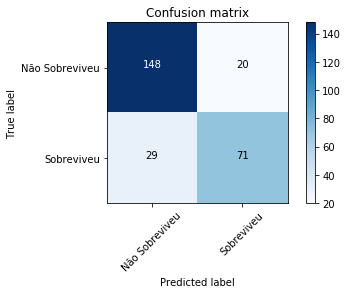

In [96]:
clf_tpot = TPOTClassifier(verbosity=2, 
                          max_time_mins=300, 
                          max_eval_time_mins=15, 
                          population_size=100,
                          generations=200)

clf_tpot.fit(X_traincv, y_traincv)
roc_tpot = clf_eval(clf_tpot, X_testcv, y_testcv)

[WARNING] [2017-07-05 20:45:31,496:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2017-07-05 20:45:31,496:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger


You are already timing task: index_run5
You are already timing task: index_run5
You are already timing task: index_run5


Classification Report
                precision    recall  f1-score   support

Não Sobreviveu       0.84      0.88      0.85       168
    Sobreviveu       0.77      0.71      0.74       100

   avg / total       0.81      0.81      0.81       268

ROC Score: 0.7925
Accuracy Score: 0.8134328358208955
Average Precision Score: 0.7949740428293317
f1 Score: 0.7395833333333333
Confusion matrix, without normalization
[[147  21]
 [ 29  71]]


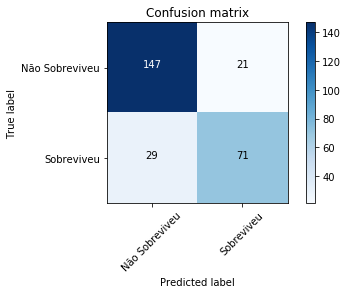

In [97]:
# https://github.com/automl/auto-sklearn

import autosklearn.classification
clf_autoskl = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task=60,
                                                               per_run_time_limit=30,
                                                               seed=0)

clf_autoskl.fit(X_traincv, y_traincv, metric=autosklearn.metrics.accuracy)

roc_autoskl = clf_eval(clf_autoskl, X_testcv, y_testcv)

#### Voting Classifier

[WARNING] [2017-07-05 20:46:29,153:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2017-07-05 20:46:29,153:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger


You are already timing task: index_run3
You are already timing task: index_run4
You are already timing task: index_run4
You are already timing task: index_run4
You are already timing task: index_run4
You are already timing task: index_run4
Optimization Progress: 189pipeline [00:59,  5.00pipeline/s]                  

Generation 1 - Current best internal CV score: 0.8250150537634408


Optimization Progress: 288pipeline [01:43,  4.25pipeline/s]

Generation 2 - Current best internal CV score: 0.8250150537634408


Optimization Progress: 386pipeline [02:36,  1.99pipeline/s]                   

Generation 3 - Current best internal CV score: 0.837905376344086


Optimization Progress: 477pipeline [03:41,  2.52pipeline/s]

Generation 4 - Current best internal CV score: 0.837905376344086


Optimization Progress: 574pipeline [05:02,  2.16pipeline/s]                   

Generation 5 - Current best internal CV score: 0.837905376344086


Optimization Progress: 668pipeline [06:07,  2.88pipeline/s]                   

Generation 6 - Current best internal CV score: 0.837905376344086


Optimization Progress: 767pipeline [07:20,  1.53pipeline/s]                   

Generation 7 - Current best internal CV score: 0.837905376344086


Optimization Progress: 863pipeline [08:45,  2.44pipeline/s]                   

Generation 8 - Current best internal CV score: 0.837905376344086


Optimization Progress: 956pipeline [09:51,  1.68pipeline/s]                   

Generation 9 - Current best internal CV score: 0.837905376344086


Optimization Progress: 1045pipeline [11:05,  2.13pipeline/s]                    

Generation 10 - Current best internal CV score: 0.8379178699436765


Optimization Progress: 1136pipeline [12:02,  1.92pipeline/s]                    

Generation 11 - Current best internal CV score: 0.8379178699436765


Optimization Progress: 1220pipeline [13:06,  1.87pipeline/s]                    

Generation 12 - Current best internal CV score: 0.8410666666666667


Optimization Progress: 1313pipeline [14:06,  1.83pipeline/s]                    

Generation 13 - Current best internal CV score: 0.8410666666666667


Optimization Progress:  99%|█████████▉| 1391/1400 [15:19<00:05,  1.73pipeline/s]

Generation 14 - Current best internal CV score: 0.8410666666666667


Optimization Progress: 1468pipeline [16:32,  1.04s/pipeline]                    

Generation 15 - Current best internal CV score: 0.8411305683563748


Optimization Progress: 1549pipeline [17:43,  1.70pipeline/s]                    

Generation 16 - Current best internal CV score: 0.8411305683563748


Optimization Progress: 1622pipeline [18:27,  1.78pipeline/s]                    

Generation 17 - Current best internal CV score: 0.8411305683563748


Optimization Progress: 100%|█████████▉| 1694/1700 [19:53<00:06,  1.07s/pipeline]

Generation 18 - Current best internal CV score: 0.8411305683563748


Optimization Progress: 1763pipeline [21:10,  1.29s/pipeline]                    

Generation 19 - Current best internal CV score: 0.8411305683563748


Optimization Progress: 1823pipeline [22:17,  1.02pipeline/s]                    

Generation 20 - Current best internal CV score: 0.8411305683563748


Optimization Progress: 100%|█████████▉| 1894/1900 [23:23<00:04,  1.48pipeline/s]

Generation 21 - Current best internal CV score: 0.8411305683563748


Optimization Progress: 1970pipeline [24:14,  1.50pipeline/s]                    

Generation 22 - Current best internal CV score: 0.8411305683563748


Optimization Progress: 2041pipeline [25:20,  1.45pipeline/s]                    

Generation 23 - Current best internal CV score: 0.8411305683563748


Optimization Progress: 2117pipeline [26:17,  1.70pipeline/s]                    

Generation 24 - Current best internal CV score: 0.8411305683563748



Best pipeline: GradientBoostingClassifier(RFE(MaxAbsScaler(input_matrix), RFE__ExtraTreesClassifier__criterion=entropy, RFE__ExtraTreesClassifier__max_features=DEFAULT, RFE__ExtraTreesClassifier__n_estimators=100, RFE__step=0.9), GradientBoostingClassifier__learning_rate=DEFAULT, GradientBoostingClassifier__max_depth=3, GradientBoostingClassifier__max_features=0.75, GradientBoostingClassifier__min_samples_leaf=DEFAULT, GradientBoostingClassifier__min_samples_split=9, GradientBoostingClassifier__n_estimators=100, GradientBoostingClassifier__subsample=0.3)
Classification Report
                precision    recall  f1-score   support

Não Sobreviveu       0.86      0.90      0.88       168
    Sobreviveu       0.82      0.75      0.79       100

   avg / total       0.85      0.85      0.85       268

ROC Score: 0.8273809523809523
Accuracy Score: 0.8470149253731343
Average Precision Score: 0.8337297031326882
f1 Score: 0.7853403141361257
Confusion matrix, without normalization
[[152  16]


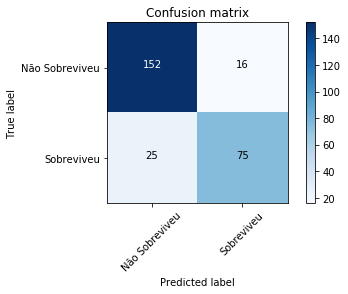

In [98]:
from sklearn.ensemble import VotingClassifier 
#http://scikit-learn.org/stable/modules/ensemble.html#votingclassifier

ensemble = VotingClassifier(estimators=[#('clf_sgdc', clf_sgdc),
                                        ('clf_lgr', clf_lr),
                                        #('clf_rdg', clf_rdg),
                                        ('clf_bgc', clf_bgc),
                                        ('clf_etc', clf_etc),
                                        ('clf_abc', clf_abc),
                                        #('clf_pct', clf_pcp),
                                        ('clf_xgb', clf_xgb),
                                        ('clf_rf', clf_rf),
                                        ('clf_etc', clf_etc),
                                        ('clf_knn', clf_knn),
                                        ('clf_autoskl', clf_autoskl),
                                        ('clf_tpot', clf_tpot),
                                        ],
                            voting='soft',
                            weights=[1,2,1,6,1,3,1,1,1,1]).fit(X_traincv, y_traincv)

roc_ens = clf_eval(ensemble, X_testcv, y_testcv)

### Plotting the results:  

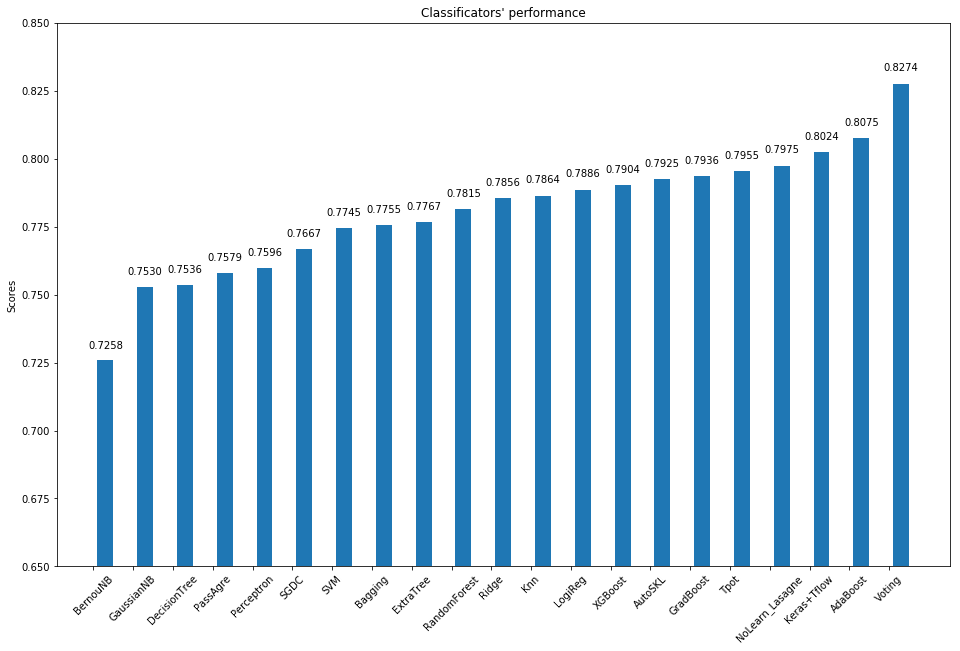

In [99]:
dic_results = {'SVM': roc_svc2,
               'RandomForest': roc_rf,
               'DecisionTree': roc_dtc,
               'ExtraTree': roc_etc,
               'AdaBoost': roc_abc,
               'GradBoost': roc_gbc,
               'SGDC': roc_sgdc,
               'Ridge': roc_rdg,
               'Perceptron': roc_pcp,
               'PassAgre': roc_pac,
               'LogiReg': roc_lr,
               'GaussianNB': roc_gnb,
               'BernouNB': roc_bnb,
               'NoLearn_Lasagne': roc_lsgn,
               #'Theano': roc_thn,
               'XGBoost':roc_xgb,
               'Knn':roc_knn,
               'Keras+Tflow': roc_keras,
               'Bagging': roc_bgc,
               'Voting': roc_ens,
               'Tpot': roc_tpot,
               'AutoSKL': roc_autoskl,
              }

import operator
tup_results = sorted(dic_results.items(), key=operator.itemgetter(1))

N = len(dic_results)
ind = np.arange(N)  # the x locations for the groups
width = 0.40       # the width of the bars

fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
rects = ax.bar(ind+0.5, list(zip(*tup_results))[1], width,)
for rect in rects:
    height = rect.get_height()
    ax.text(rect.get_x()+rect.get_width()/2., 
            1.005*height, 
            '{0:.4f}'.format(height), 
            ha='center', 
            va='bottom',)

ax.set_ylabel('Scores')
ax.set_ylim(ymin=0.65,ymax = 0.85)
ax.set_title("Classificators' performance")
ax.set_xticks(ind + width/2.)
ax.set_xticklabels(list(zip(*tup_results))[0], rotation=45)

plt.show()

Choosing the best classifier and training with all training data:

In [100]:
output = ensemble.predict(X_test)
print(output[10:20])
print()
output_prob = ensemble.predict_proba(X_test)
print(output_prob[10:20])

[ 0.  0.  1.  0.  1.  1.  0.  0.  0.  0.]

[[ 0.69310303  0.30689697]
 [ 0.82935077  0.17064923]
 [ 0.03386942  0.96613058]
 [ 1.09334027 -0.09334027]
 [ 0.05441678  0.94558322]
 [ 0.14483525  0.85516475]
 [ 0.8448917   0.1551083 ]
 [ 0.62824559  0.3717544 ]
 [ 0.76063982  0.23936018]
 [ 0.91144633  0.08855367]]
